<a href="https://colab.research.google.com/github/viniciusandrre/Redes-Neurais/blob/arquivo-inicial/C%C3%B3pia_de_slides_13_redes_neurais_p3_pratica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/thalesvalente/teaching/blob/main/artificial-intelligence/lessons/slides-13-redes-neurais-p3-pratica-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introdução

Este notebook foi preparado para servir como um guia teórico e prático sobre Redes Neurais Artificiais, abrangendo desde os principais conceitos até a implementação de exemplos básicos em Python. Foi elaborado para alunos de Ciência da Computação, visando fornecer uma base sólida e atual sobre o tema.

As Redes Neurais Artificiais (RNAs) são inspiradas no funcionamento do cérebro humano, onde neurônios artificiais são conectados em camadas, processando informações e ajustando seus pesos (sinapses) para reconhecer padrões, classificar dados e realizar previsões.

# **2. Teoria das Redes Neurais**

## **2.1. Conceitos Fundamentais**

- **Neurônio Artificial**: Unidade de processamento que recebe entradas (xᵢ) com respectivos pesos (wᵢ) e calcula um somatório. Em seguida, aplica-se uma função de ativação para obter a saída do neurônio.
- **Camadas da Rede**:
  - **Camada de Entrada**: Recebe o conjunto de características de cada amostra (por exemplo, pixels de imagem).
  - **Camadas Ocultas (Hidden Layers)**: Responsáveis por mapear os dados de forma não linear, aprendendo características mais complexas. É nela que ocorre a maior parte do “trabalho” da rede.
  - **Camada de Saída**: Fornece o resultado final do modelo, que pode ser uma probabilidade para cada classe (em classificação) ou um valor contínuo (em regressão).

## **2.2. Processamento Neural**

O processamento neural em uma rede é dividido em duas etapas principais :contentReference[oaicite:2]{index=2}:

1. **Learning (Treinamento)**: A rede ajusta os pesos (sinápticos) de acordo com a função de custo, minimizando o erro entre predições e valores reais.
2. **Recall (Inferência)**: A rede, já treinada, recebe novas entradas e produz uma saída, sem alterar os pesos.

## **2.3. Tipos de Arquitetura**

1. **Feedforward**: O fluxo de dados segue apenas de “esquerda para direita”, ou seja, da camada de entrada até a saída, sem loops.
2. **Recorrentes (RNN)**: Há realimentação dos neurônios, permitindo que a saída de camadas anteriores influencie os passos seguintes.

## **2.4. Funções de Ativação**

A função de ativação é essencial para introduzir não linearidade no modelo. Algumas das funções mais comuns:

- **ReLU (Rectified Linear Unit)**:
  $
    f(x) =
      \begin{cases}
         0 & x < 0 \\
         x & x \geq 0
      \end{cases}
  $
  - Vantagens: Simples, computacionalmente eficiente, evita em boa parte o problema de _vanishing gradient_.
  - Desvantagem: Possibilidade de “neurônios mortos” caso \( x < 0 \) constante.

- **Sigmoid**:
  $
    f(x) = \frac{1}{1 + e^{-x}}
  $
  - Saída no intervalo (0,1), adequada para classificação binária.
  - Sofre mais com _vanishing gradient_ em redes profundas.

- **Tanh**:
  $
    f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $
  - Intervalo de saída (-1, 1). Similar à sigmoid, porém centrada em zero.

- **Softmax**:
  $
    f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
  $
  - Usada na camada de saída para problemas de classificação com múltiplas classes.
  - Retorna probabilidades que somam 1.


## **2.5. Funções de Custo**

A função de custo mede o quão distante o modelo está do objetivo.

- **Erro Quadrático Médio (MSE)**
  $$
    MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  - Utilizada em problemas de regressão (ativação linear na saída).

- **Entropia Cruzada Binária (Binary Cross-Entropy – BCE)**:    
  $$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)\right]
  $$
  - Adequada para problemas de classificação binária (ativação sigmoid na saída).

- **Entropia Cruzada Categórica (CCE)**:    
  $$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
  $$
  - Ideal para classificação multiclasse (ativação softmax na saída).

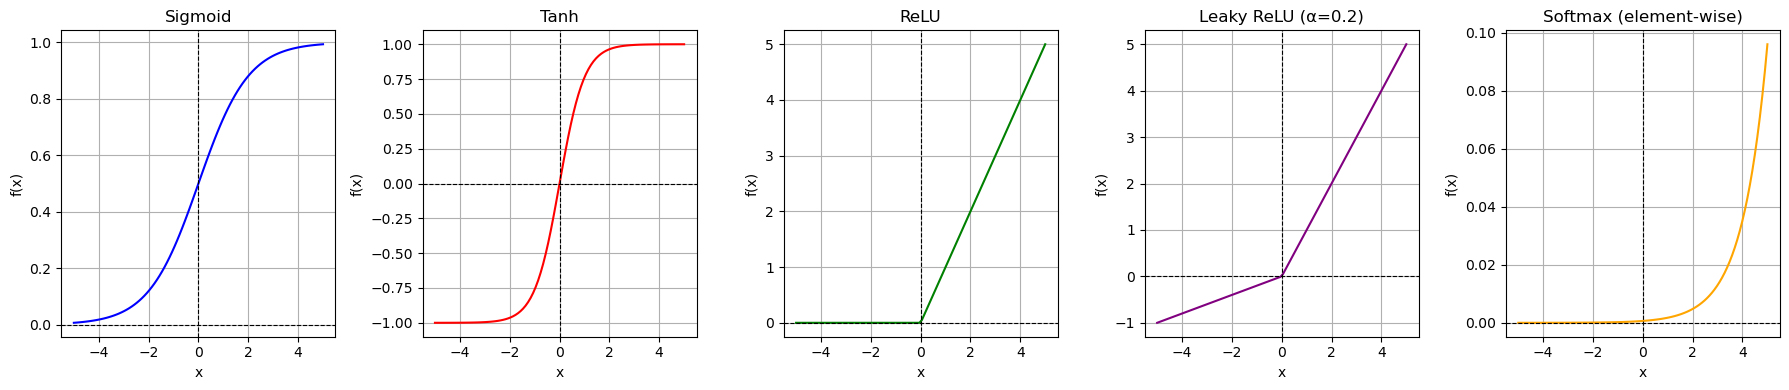

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição das funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar overflow numérico
    return exp_x / np.sum(exp_x)

# Gerar valores de entrada
x = np.linspace(-5, 5, 100)

# Calcular valores de saída
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x, alpha=0.2)  # Aumentando o alpha para tornar mais evidente a inclinação
y_softmax = softmax(x)  # Softmax aplicado a cada ponto separadamente

# Criar gráficos lado a lado
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

# Função auxiliar para desenhar eixos X=0 e Y=0
def plot_with_axes(ax, x, y, title, color):
    ax.plot(x, y, label=title, color=color)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Linha horizontal em y=0
    ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Linha vertical em x=0
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.grid()

# Plotando cada função com eixos adicionais
plot_with_axes(axes[0], x, y_sigmoid, "Sigmoid", "blue")
plot_with_axes(axes[1], x, y_tanh, "Tanh", "red")
plot_with_axes(axes[2], x, y_relu, "ReLU", "green")
plot_with_axes(axes[3], x, y_leaky_relu, "Leaky ReLU (α=0.2)", "purple")
plot_with_axes(axes[4], x, y_softmax, "Softmax (element-wise)", "orange")

# Ajuste de layout
plt.tight_layout()
plt.show()


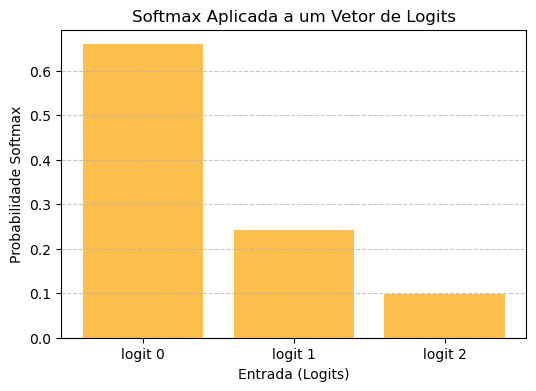

In [ ]:
# Exemplo da Softmax aplicada a um vetor de logits

# Criando um conjunto de logits (exemplo de saídas de uma camada densa)
logits = np.array([2.0,1.0,0.1])

# Aplicando a Softmax corretamente ao vetor de logits
softmax_outputs = softmax(logits)

# Plotando a distribuição Softmax
plt.figure(figsize=(6, 4))
plt.bar(range(len(logits)), softmax_outputs, color="orange", alpha=0.7)
plt.xticks(range(len(logits)), labels=[f"logit {i}" for i in range(len(logits))])
plt.xlabel("Entrada (Logits)")
plt.ylabel("Probabilidade Softmax")
plt.title("Softmax Aplicada a um Vetor de Logits")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

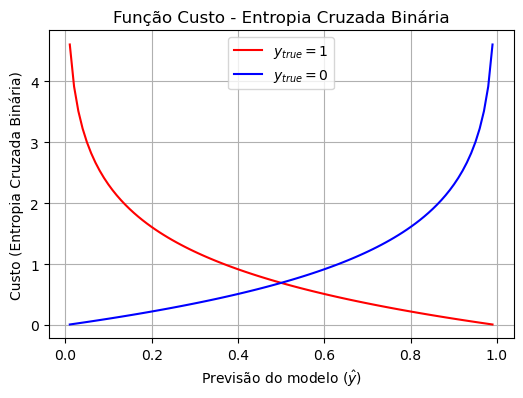

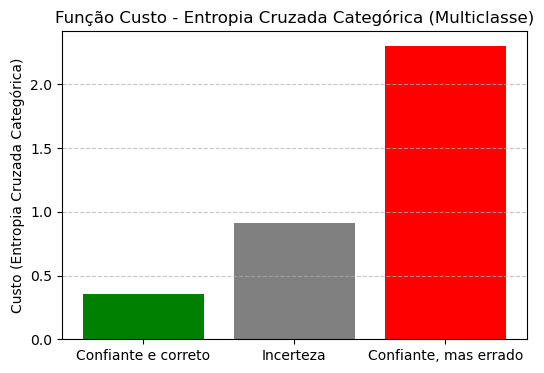

In [ ]:
# Reimportando bibliotecas após reset do ambiente
import numpy as np
import matplotlib.pyplot as plt

# Função de entropia cruzada binária
def binary_cross_entropy(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Valores de previsão (y_pred) variando entre 0.01 e 0.99 para evitar log(0)
y_pred = np.linspace(0.01, 0.99, 100)

# Calculando BCE para os dois casos possíveis de y_true
bce_y1 = binary_cross_entropy(1, y_pred)  # Quando y_true = 1
bce_y0 = binary_cross_entropy(0, y_pred)  # Quando y_true = 0

# Criando o gráfico para Entropia Cruzada Binária
plt.figure(figsize=(6, 4))
plt.plot(y_pred, bce_y1, label=r"$y_{true} = 1$", color="red")
plt.plot(y_pred, bce_y0, label=r"$y_{true} = 0$", color="blue")
plt.xlabel("Previsão do modelo ($\hat{y}$)")
plt.ylabel("Custo (Entropia Cruzada Binária)")
plt.title("Função Custo - Entropia Cruzada Binária")
plt.legend()
plt.grid()
plt.show()

# --- ENTROPIA CRUZADA CATEGÓRICA (MULTICLASSE) ---

# Função de entropia cruzada categórica
def categorical_cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred), axis=1)

# Criando predições para um problema com 3 classes (exemplo: classificação multiclasse)
y_pred_multi = np.array([
    [0.7, 0.2, 0.1],  # Modelo confiante e correto (classe 1)
    [0.4, 0.3, 0.3],  # Modelo incerto
    [0.1, 0.1, 0.8],  # Modelo confiante, mas errado (classe 1 correta seria 0.1)
])

# Definição das classes reais (one-hot encoding)
y_true_multi = np.array([
    [1, 0, 0],  # Classe 1 correta
    [1, 0, 0],  # Classe 1 correta
    [1, 0, 0],  # Classe 1 correta
])

# Calculando a entropia cruzada categórica
cce_values = categorical_cross_entropy(y_true_multi, y_pred_multi)

# Criando o gráfico para Entropia Cruzada Categórica
plt.figure(figsize=(6, 4))
plt.bar(["Confiante e correto", "Incerteza", "Confiante, mas errado"], cce_values, color=["green", "gray", "red"])
plt.ylabel("Custo (Entropia Cruzada Categórica)")
plt.title("Função Custo - Entropia Cruzada Categórica (Multiclasse)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Definindo os valores reais e previstos
y_true = 1  # Classe correta
y_pred = 0.9  # Previsão do modelo

# Calculando Erro Quadrático Médio (MSE)
mse_cost = (y_true - y_pred) ** 2

# Calculando Entropia Cruzada Binária (BCE)
bce_cost = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

mse_cost, bce_cost

(0.009999999999999995, 0.10536051565782628)

# **3. Exemplos Práticos em Python**

### 3.1 Problema do AND

1. **Rede Neural implementada sem bibliotecas (do zero)** usando apenas Python e NumPy para manipular arrays.
2. **Rede Neural usando PyTorch** (usando `nn.Module`).
3. **Rede Neural usando Tensorflow**(usando `tf.keras`).

A tabela verdade do AND é:

| x1 | x2 | y (x1 AND x2) |
|----|----|---------------|
|  0 |  0 |      0        |
|  0 |  1 |      0        |
|  1 |  0 |      0        |
|  1 |  1 |      1        |  
  
--
> **Observação**: O problema do AND é linearmente separável, portanto um único neurônio (camada única) com função de ativação degrau pode aprendê-lo.  Neste exemplo, resolveremos o problema lógico **AND** utilizando **exatamente o mesmo procedimento em todas as versões**:  
- **Função de Ativação**: degrau (_step function_).  
- **Regra de Atualização**: Regra do Perceptron clássico (não usa gradiente ou entropia cruzada).  
- **Loop de Treinamento** manual, iterando sobre cada amostra e ajustando pesos quando há erro.

Além disso, **geraremos uma animação** mostrando, passo a passo, como a **reta de separação** se ajusta após cada atualização de peso, na versão “sem bibliotecas” (pura NumPy). Nas versões PyTorch e TensorFlow, mostraremos apenas o loop de treinamento, mas o procedimento é igual.

#### 3.1.1 Conceitos teóricos

Um **Perceptron de 2 entradas** define sua fronteira de decisão por meio da equação:

$$
w_1 \cdot x_1 \;+\; w_2 \cdot x_2 \;+\; b = 0
$$

- Aqui, $ (x_1, x_2) $ representa um ponto no plano 2D.
- $ (w_1, w_2) $ são os **pesos sinápticos** do perceptron.
- $ b $ é o **bias** (deslocamento da fronteira de decisão).

Agora, vamos **transformar a equação de uma reta** comum no **formato do perceptron** e, em seguida, **isolar $ x_2 $** para entender como visualizar a reta no gráfico.
Na **regressão linear** simples, a equação de uma reta é escrita como:

$$
y = a \, x + b,
$$

onde:
- $ x $ é a **variável independente** (eixo horizontal),
- $ y $ é a **variável dependente** (eixo vertical),
- $ a $ (ou slope) é o **coeficiente angular** (inclinação da reta),
- $ b $ é o **coeficiente linear** (ponto onde a reta cruza o eixo $y$).

A questão que surge é:
- Como transformar essa equação na forma usada pelo **Perceptron**?
---  

o **Perceptron** separa duas regiões do plano por meio da equação:

$$
w_1 \cdot x_1 + w_2 \cdot x_2 + b_{\text{perc}} = 0.
$$

Se quisermos que essa reta seja **a mesma** que $ y = ax + b $, podemos fazer:
1. Associamos **as variáveis**:
   - $ x_1 \equiv x $  
   - $ x_2 \equiv y $  

2. Substituímos $ y $ pela equação da reta:

$$
y = ax + b   
$$
$$
x_2 = ax_1 + b  
$$
$$
x_2 - a x_1 - b = 0
$$

Ou seja:

$$
a \, x_1 - x_2 + b  = 0
$$


3. Comparando com a forma do perceptron $ w_1 x_1 + w_2 x_2 + b_{\text{perc}} = 0 $, temos:

$$
\underbrace{a}_{w_1} \cdot x_1
\;+\;
\underbrace{(-1)}_{w_2} \cdot x_2
\;+\;
\underbrace{b}_{b_{\text{perc}}}
= 0.
$$

Portanto, **os parâmetros do Perceptron são**:
- $ w_1 = a $ (inclinação da reta).
- $ w_2 = -1 $ (peso negativo para $ x_2 $).
- $ b_{\text{perc}} = b $ (o mesmo bias da regressão).

4. Isolando $ x_2 $
Agora, queremos expressar $ x_2 $ explicitamente, para poder desenhar a reta:

$$
w_1 x_1 + w_2 x_2 + b_{\text{perc}} = 0.
$$

Substituímos $ w_1 = a $, $ w_2 = -1 $ e $ b_{\text{perc}} = b $:

$$
a x_1 - x_2 + b = 0 \Longrightarrow -x_2 = -a x_1 - b
$$

Resolvendo para $ x_2 $, passando o $(-1)$, que é $w_2$ para o outro lado dividindo e isolando o sinal da parte de cima temos:

$$
x_2 = -\frac{(b + a x_1)}{-1} \Longrightarrow  b + a x_1
$$

$$
x_2 = a x_1 + b
$$

$$
y = a x + b
$$

Isso confirma que a equação original **é exatamente a mesma** no formato perceptron. Assim, para plotar a reta em termos de $w_1$, $w_2$, $x_1$,$x_2$, fazemos:
$$
x_2 = -\frac{(b + w_1 x_1)}{w_2}
$$


Equação original (regressão): y = a*x + b
   => y = 1.5 * x + (-0.2)

Equação no formato perceptron: w1*x1 + w2*x2 + b_perc = 0
   => 1.5 * x1 + -1 * x2 + (-0.2) = 0



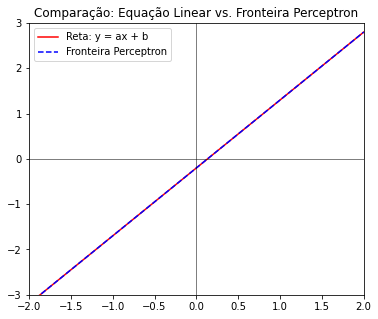

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Definição da reta na forma y = ax + b
a = 1.5     # Inclinação (slope)
b = -0.2   # Intercepto

print("Equação original (regressão): y = a*x + b")
print(f"   => y = {a} * x + ({b})\n")

# 2) Geramos valores de x
x_vals = np.linspace(-2, 2, 50)  # Intervalo de x de -2 a 2
y_vals = a*x_vals + b            # Cálculo da reta na forma clássica

# 3) Convertendo para formato perceptron
w1 = a
w2 = -1
b_perc = b

print("Equação no formato perceptron: w1*x1 + w2*x2 + b_perc = 0")
print(f"   => {w1} * x1 + {w2} * x2 + ({b_perc}) = 0\n")

# 4) Isolando x2 na equação do Perceptron
x2_vals = -(b_perc + w1*x_vals)/w2  # Isso nos dá a mesma reta

# 5) Plotando
plt.figure(figsize=(6,5))
plt.plot(x_vals, y_vals, 'r-', label="Reta: y = ax + b")
plt.plot(x_vals, x2_vals, 'b--', label="Fronteira Perceptron")

plt.axhline(0, color='black', linewidth=0.5)  # eixo X
plt.axvline(0, color='black', linewidth=0.5)  # eixo Y

plt.xlim(-2, 2)
plt.ylim(-3, 3)

plt.title("Comparação: Equação Linear vs. Fronteira Perceptron")
plt.legend()
plt.show()

*Portanto*, podemos concluir que, a partir da equação

$$
x_2 = -\frac{(b + w_1 x_1)}{w_2} \Longrightarrow x_2 = -\frac{b}{w_2} - \frac{w_1}{w_2}x_1 \Longrightarrow y = -\frac{b}{w_2} - \frac{w_1}{w_2}x
$$

1. **$w_2$ controla a inclinação da reta**

   - A inclinação é dada por
     $$
     -\dfrac{w_1}{\,w_2\,} = a
     $$
   - Se $\lvert w_2 \rvert$ é grande (mantendo $w_1$ fixo), o valor da inclinação se aproxima de zero (a reta fica mais horizontal).
   - Se $\lvert w_2 \rvert$ é pequena (mantendo $w_1$ fixo), a inclinação aumenta em módulo (reta mais inclinada ou vertical).

   Ou seja, $w_2$ regula o quão inclinada a reta será.

2. **$w_2$ controla a direção (subindo ou descendo)**
Vejamos o sinal de $w_2$ :
   - Se $w_2 > 0$, então $-\frac{w_1}{w_2}$ será negativo → a reta fica inclinada para baixo ↘.
   - Se $w_2 < 0$, então $-\frac{w_1}{w_2}$ será positivo → a reta fica inclinada para cima ↗.
Portanto:
- Se $w_2$ é positivo, a reta desce ↘.
- Se $w_2$ é negativo, a reta sobe ↗.

3. **$w_2$ afeta o deslocamento no eixo $x_2$**  
O intercepto da reta no eixo $x_2$ (isto é, onde a reta cruza o eixo $x_2$ e $x_1 = 0$) é dado por:
     $$
     \text{intercepto em }x_2
     \;=\;
     -\dfrac{b}{\,w_2\,}.
     $$
   Isso significa que:
      - Se $\lvert w_2 \rvert$ é grande, $-\frac{b}{w_2}$ será pequeno e esse intercepto se aproxima de 0 (mais próximo do eixo $x_1$).
      - Se $\lvert w_2 \rvert$ é pequeno, $-\frac{b}{w_2}$ cresce em módulo (será grande) e a reta se afasta do eixo $x_1$.

$$
\boxed{
\text{Em resumo, } w_2 \text{ determina a inclinação, o sentido e o deslocamento vertical da reta.}
}
$$

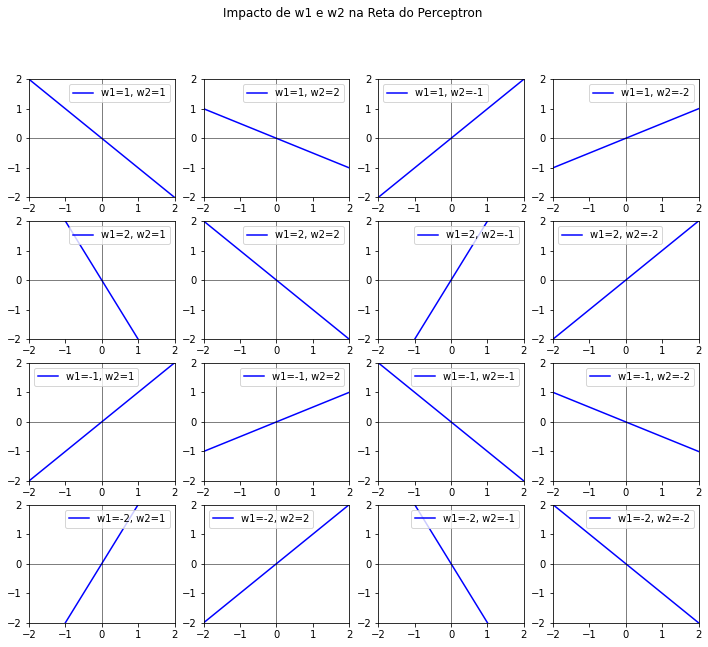

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos pesos e bias
w1_values = [1, 2, -1, -2]  # Diferentes valores de w1 para testar
w2_values = [1, 2, -1, -2]  # Diferentes valores de w2 para testar
b = 0  # Bias fixo para facilitar a análise

# Definição do intervalo de x1
x1_vals = np.linspace(-2, 2, 50)

# Criar subplots para visualizar diferentes configurações de w1 e w2
fig, axes = plt.subplots(len(w1_values), len(w2_values), figsize=(12, 10))

for i, w1 in enumerate(w1_values):
    for j, w2 in enumerate(w2_values):
        ax = axes[i, j]
        if abs(w2) > 1e-9:  # Evitar divisão por zero
            x2_vals = -(b + w1 * x1_vals) / w2
            ax.plot(x1_vals, x2_vals, 'b-', label=f"w1={w1}, w2={w2}")
            ax.axhline(0, color='black', linewidth=0.5)  # Eixo X
            ax.axvline(0, color='black', linewidth=0.5)  # Eixo Y
            ax.set_xlim(-2, 2)
            ax.set_ylim(-2, 2)
            ax.legend()

plt.suptitle("Impacto de w1 e w2 na Reta do Perceptron")
plt.show()

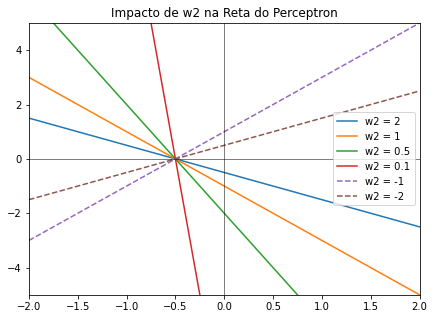

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixamos um valor para w1 e b
w1 = 2
b = 1

# Testamos diferentes valores de w2
w2_values = [2, 1, 0.5, 0.1, -1, -2]

# Criamos um conjunto de x1 (horizontal)
x1_vals = np.linspace(-2, 2, 50)

plt.figure(figsize=(7,5))
for w2 in w2_values:
    # Calculamos x2 para cada w2
    x2_vals = -(b + w1*x1_vals)/w2

    # Definimos um estilo de linha baseado no sinal de w2
    linestyle = '-' if w2 > 0 else '--'
    plt.plot(x1_vals, x2_vals, linestyle, label=f"w2 = {w2}")

# Adicionamos eixos e legenda
plt.axhline(0, color='black', linewidth=0.5)  # eixo X
plt.axvline(0, color='black', linewidth=0.5)  # eixo Y
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.legend()
plt.title("Impacto de w2 na Reta do Perceptron")
plt.show()


#### 3.1.1 Problema do END - Rede Neural implementada do zero usando `NumPy`

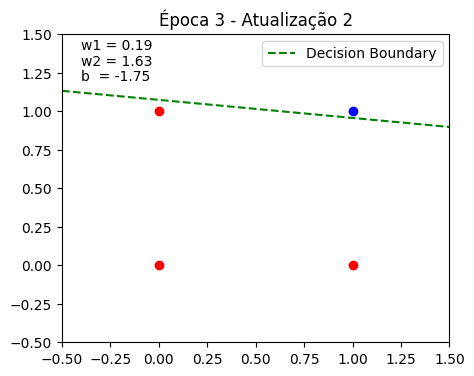

Época 3, Erros: 1
Época 4, Erros: 0


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
# X: entradas; y: saída esperada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1          # Taxa de aprendizado (eta). Valor que controla o passo de ajuste.
max_epochs = 10   # Número máximo de épocas de treinamento (iteradas completas nos dados).

# Pesos e bias (inicializados aleatoriamente).
# Aqui, W[0] = w1 e W[1] = w2, e b é o bias.
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias
# -------------------------------------------------------
# Ex.: se W = [1.5, -0.8], então w1 = 1.5, w2 = -0.8
#      se b = 0.3, então bias = 0.3
# -------------------------------------------------------

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    """
    Retorna 1 se z >= 0, caso contrário 0.
    """
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUNÇÃO PARA PLOTAR A FRONTEIRA DE DECISÃO
# -------------------------------------------------------
def plot_decision_boundary(W, b, X, y, epoch, update_i):
    """
    Plota os pontos (X, y) e a reta dada por:
      w1*x1 + w2*x2 + b = 0  =>  x2 = -(b + w1*x1)/w2
    Parâmetros:
      - W, b: pesos atuais do Perceptron e o bias.
      - X, y: dados de entrada e suas respectivas classes.
      - epoch: época atual (para exibir no título).
      - update_i: índice de atualização dentro da época atual.
    """
    plt.figure(figsize=(5,4))

    # 4.1) Plotando pontos (vermelho = classe 0, azul = classe 1)
    for i, (x_pt, label) in enumerate(zip(X, y)):
        if label == 0:
            plt.plot(x_pt[0], x_pt[1], 'ro')
        else:
            plt.plot(x_pt[0], x_pt[1], 'bo')

    # 4.2) Gerar reta (Decision Boundary) se w2 != 0
    x_vals = np.linspace(-0.5, 1.5, 50)
    if abs(W[1]) > 1e-9:
        y_vals = -(b + W[0]*x_vals) / W[1]
        plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

    # 4.3) Ajustes de exibição
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    # 4.4) Anota na figura os valores atuais de w1, w2, b
    w1_txt = f"w1 = {W[0]:.2f}"
    w2_txt = f"w2 = {W[1]:.2f}"
    b_txt  = f"b  = {b:.2f}"
    plt.text(0.05, 0.95, w1_txt, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.90, w2_txt, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.85, b_txt,  transform=plt.gca().transAxes, fontsize=10, color='black')

    plt.title(f"Época {epoch} - Atualização {update_i}")
    plt.legend()
    plt.show()


# -------------------------------------------------------
# 5) TREINAMENTO + ANIMAÇÃO
# -------------------------------------------------------
# O "epoch" (época) conta quantas vezes passamos por todo o conjunto de dados.
# "update_i" conta qual atualização dentro da época estamos fazendo.
# "error_count" é quantos erros (e, portanto, atualizações) ocorreram na época.
# Se error_count = 0 ao final de uma época, significa que o Perceptron classificou
# todos os pontos corretamente e podemos encerrar.
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0  # contador de erros nessa época
    # len(X) é 4, pois há 4 amostras. Dentro desse loop, você acessa cada amostra X[i], isto é:
    # i=0 -> X[0] = [0, 0], y[0] = 0
    # i=1 -> X[1] = [0, 1], y[1] = 0
    # i=2 -> X[2] = [1, 0], y[2] = 0
    # i=3 -> X[3] = [1, 1], y[3] = 1
    for i in range(len(X)):
        # 5.1) Forward: cálculo z = (w1*x1 + w2*x2 + b)
        # calcula z = sum_j(x[i][j] * W[j]) + b
        z = np.dot(X[i], W) + b

        # 5.2) y_pred = step_function(z)
        y_pred = step_function(z)

        # 5.3) Erro e = (y_verdadeiro - y_predito)
        e = y[i] - y_pred

        # 5.4) Ajuste de pesos (Regra do Perceptron) se e != 0
        if e != 0:
            # w[j] = w[j] + n * (y[i] - y_pred) * x[i][j]
            W += lr * e * X[i]
            # b = b + n * (y[i] - y_pred)
            b += lr * e
            error_count += 1

            # Gerar animação (limpa o plot anterior, gera o plot novo)
            clear_output(wait=True)
            plot_decision_boundary(W, b, X, y, epoch, update_i=i+1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    # Se zero erros nesta época, significa convergência
    if error_count == 0:
        break


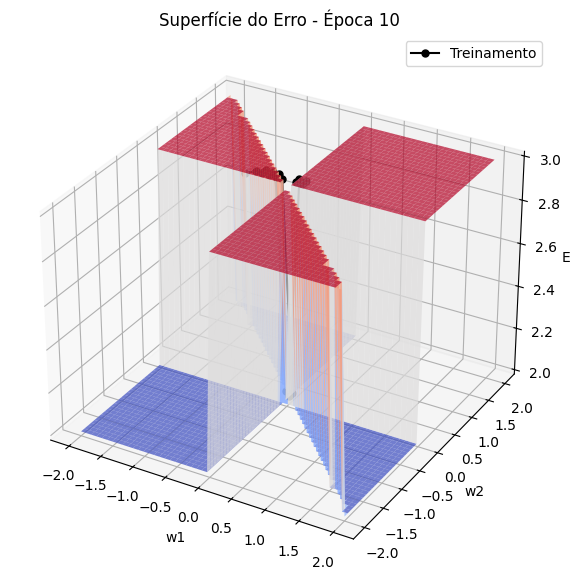

Época 10, Erros: 1


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
# X: entradas; y: saída esperada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1          # Taxa de aprendizado (eta). Valor que controla o passo de ajuste.
max_epochs = 10   # Número máximo de épocas de treinamento (iteradas completas nos dados).

# Pesos e bias (inicializados aleatoriamente).
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUNÇÃO DE ERRO DO PERCEPTRON
# -------------------------------------------------------
def perceptron_error(W1, W2, b, X, y):
    errors = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b
        y_pred = step_function(z)
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 5) TREINAMENTO + ANIMAÇÃO COM SUPERFÍCIE DE ERRO
# -------------------------------------------------------
w1_range = np.linspace(-2, 2, 50)
w2_range = np.linspace(-2, 2, 50)
error_surface = np.zeros((len(w1_range), len(w2_range)))

# Preencher a superfície de erro
b_fixed = 0
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        error_surface[i, j] = perceptron_error(w1, w2, b_fixed, X, y)

W_path = []  # Para armazenar o caminho dos pesos ao longo do treinamento

epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0
    for i in range(len(X)):
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)
        e = y[i] - y_pred

        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1
            W_path.append((W[0], W[1]))

            # Atualiza a visualização
            clear_output(wait=True)
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
            ax.plot_surface(W1_grid, W2_grid, error_surface.T, cmap='coolwarm', alpha=0.7)

            # Plota o caminho percorrido pelos pesos
            if len(W_path) > 1:
                W1_vals, W2_vals = zip(*W_path)
                errors_vals = [perceptron_error(w1, w2, b_fixed, X, y) for w1, w2 in W_path]
                ax.plot(W1_vals, W2_vals, errors_vals, marker='o', color='black', markersize=5, label="Treinamento")

            ax.set_xlabel("w1")
            ax.set_ylabel("w2")
            ax.set_zlabel("Erro")
            ax.set_title(f"Superfície do Erro - Época {epoch}")
            plt.legend()
            plt.show()
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    if error_count == 0:
        break


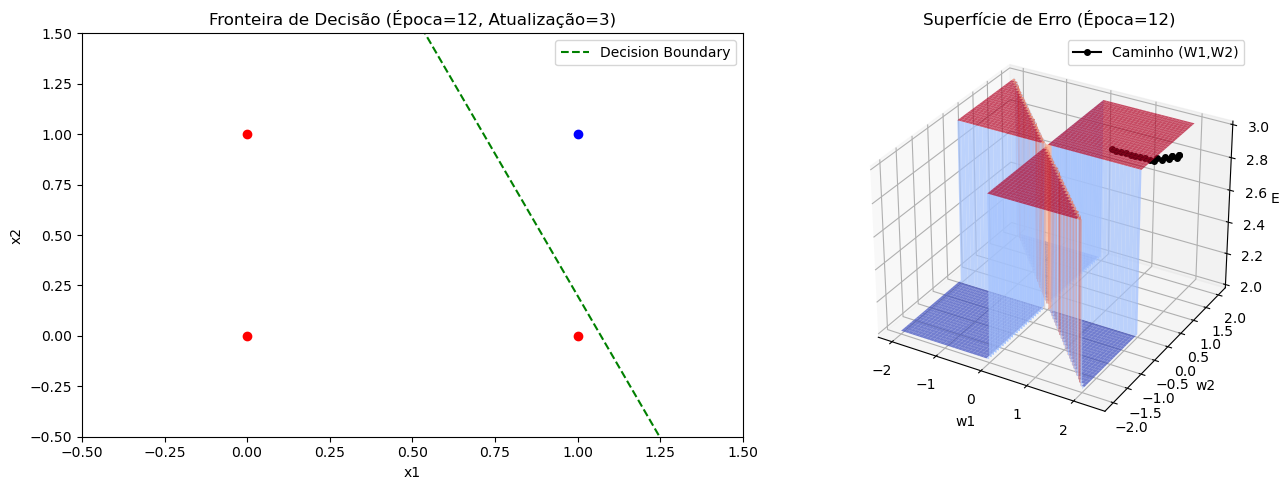

Época 12, Erros: 1
Época 13, Erros: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1        # Taxa de aprendizado
max_epochs = 20 # Número máximo de épocas

# Pesos (w1, w2) e bias inicializados aleatoriamente
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUNÇÃO DE ERRO DO PERCEPTRON (SUPERFÍCIE)
#    Usada para plotar a superfície de erro (fixando b=0).
# -------------------------------------------------------
def perceptron_error(W1, W2, b_fixed, X, y):
    errors = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b_fixed
        y_pred = step_function(z)
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 5) PREPARANDO A SUPERFÍCIE DE ERRO 3D
# -------------------------------------------------------
N = 200  # Resolução da superfície (200x200 pontos)
w1_range = np.linspace(-2, 2, N)
w2_range = np.linspace(-2, 2, N)
error_surface = np.zeros((len(w1_range), len(w2_range)))

b_fixed = 0  # Usado somente para calcular a superfície
for i, w1_val in enumerate(w1_range):
    for j, w2_val in enumerate(w2_range):
        error_surface[i, j] = perceptron_error(w1_val, w2_val, b_fixed, X, y)

# -------------------------------------------------------
# Para armazenar o caminho dos pesos (w1, w2) ao longo do
# treinamento, conforme forem sendo atualizados.
# -------------------------------------------------------
W_path = [(W[0], W[1])]  # começa com o valor inicial

# -------------------------------------------------------
# 6) FUNÇÃO para plotar (A) Fronteira de Decisão (2D) e
#                         (B) Superfície de Erro (3D)
# -------------------------------------------------------
def plot_all(W, b, X, y, W_path, epoch, update_i):
    """
    Gera uma única figura com 2 subplots:
      - Subplot 1 (esquerda): Fronteira de decisão em 2D
      - Subplot 2 (direita): Superfície de erro em 3D + caminho (W_path)
    """
    fig = plt.figure(figsize=(14, 5))

    # -----------------------------------------------
    # Subplot 1: Fronteira de decisão em 2D
    # -----------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)

    # Plotando os pontos (vermelho = classe 0, azul = classe 1)
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')

    # Reta de decisão se w2 != 0
    if abs(W[1]) > 1e-9:
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = -(b + W[0] * x_vals)/W[1]
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()

    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_title(f"Fronteira de Decisão (Época={epoch}, Atualização={update_i})")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    # -----------------------------------------------
    # Subplot 2: Superfície de erro em 3D
    # -----------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    # Plota a superfície de erro
    W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
    ax2.plot_surface(W1_grid, W2_grid, error_surface.T, cmap='coolwarm', alpha=0.7)

    # Caminho percorrido no plano (w1,w2)
    if len(W_path) > 0:
        W1_vals, W2_vals = zip(*W_path)
        error_vals = [perceptron_error(w1p, w2p, b_fixed, X, y)
                      for (w1p, w2p) in W_path]
        ax2.plot(W1_vals, W2_vals, error_vals,
                 marker='o', color='black', markersize=4,
                 label="Caminho (W1,W2)")

    ax2.set_xlabel("w1")
    ax2.set_ylabel("w2")
    ax2.set_zlabel("Erro")
    ax2.set_title(f"Superfície de Erro (Época={epoch})")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 7) LOOP DE TREINAMENTO + ANIMAÇÃO DUPLA
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0

    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)

        # Erro
        e = y[i] - y_pred

        # Ajuste de pesos (Regra do Perceptron) se houve erro
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1

            # Salva o novo (w1, w2) no caminho
            W_path.append((W[0], W[1]))

            # Gera animação (limpa output anterior, depois plota)
            clear_output(wait=True)
            plot_all(W, b, X, y, W_path, epoch, update_i=i+1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    # Se não houve nenhum erro nesta época, convergiu
    if error_count == 0:
        break


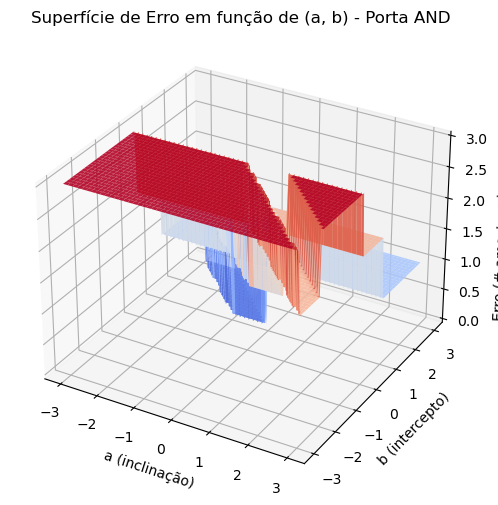

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------------------------
# 1) DADOS: PORTA AND
# ----------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# ----------------------------------------------------------
# 2) FUNÇÃO DE PREDIÇÃO USANDO (a, b) EM x2 >= a*x1 + b
#    Se x2 >= a*x1 + b, prevê classe 1; caso contrário, 0.
# ----------------------------------------------------------
def step_predict(a, b, x):
    """
    Retorna 1 se x2 >= a*x1 + b, senão 0.
    """
    x1, x2 = x
    return 1 if (x2 >= a*x1 + b) else 0

# ----------------------------------------------------------
# 3) FUNÇÃO DE ERRO: CONTA QUANTAS AMOSTRAS SÃO CLASSIFICADAS
#    INCORRETAMENTE PELO PAR (a, b).
# ----------------------------------------------------------
def classification_error(a, b, X, y):
    errors = 0
    for i in range(len(X)):
        y_pred = step_predict(a, b, X[i])
        if y_pred != y[i]:
            errors += 1
    return errors

# ----------------------------------------------------------
# 4) CONSTRUÇÃO DA SUPERFÍCIE DE ERRO (a, b) -> erro
#    a e b vão variar em intervalos escolhidos (por exemplo, [-3, 3]).
# ----------------------------------------------------------
N = 100  # resolução da malha
a_vals = np.linspace(-3, 3, N)
b_vals = np.linspace(-3, 3, N)

# Matriz para armazenar o erro
error_surface = np.zeros((N, N))

# Para cada (a, b) no grid, calcule quantas amostras o classificador erra
for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error(a_, b_, X, y)

# ----------------------------------------------------------
# 5) PLOT DA SUPERFÍCIE DE ERRO 3D
# ----------------------------------------------------------
A, B = np.meshgrid(a_vals, b_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Transpomos error_surface pois meshgrid(A,B) tem forma (N,N) casando com [j,i]
ax.plot_surface(A, B, error_surface.T, cmap='coolwarm', alpha=0.9)

ax.set_xlabel('a (inclinação)')
ax.set_ylabel('b (intercepto)')
ax.set_zlabel('Erro (# amostras incorretas)')
ax.set_title('Superfície de Erro em função de (a, b) - Porta AND')

plt.show()


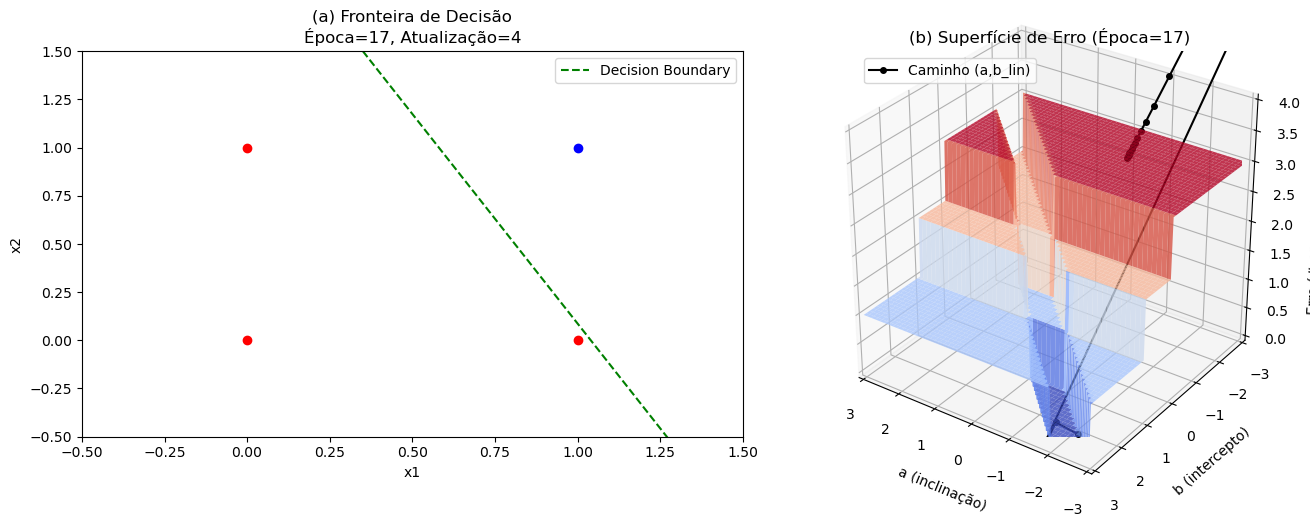

Época 17, Erros: 1
Época 18, Erros: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.01         # Taxa de aprendizado
max_epochs = 30  # Número máximo de épocas

# Pesos iniciais (w1, w2) e bias (b)
W = np.random.randn(2)  # (w1, w2)
b = np.random.randn()   # bias

# -------------------------------------------------------
# 3) FUNÇÃO STEP (DEGRAU)
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) CONVERSÃO DE (w1, w2, b) -> (a, b_lin)
#    Reta: w1*x1 + w2*x2 + b = 0  =>  x2 = - (b + w1*x1)/w2
#    Logo: a = -w1/w2,  b_lin = -b/w2
# -------------------------------------------------------
def w2ab(w1, w2, b):
    """
    Converte pesos do Perceptron para (a, b_lin):
      x2 = a*x1 + b_lin
    Se w2 ~ 0, a e b_lin ficam indefinidos;
    aqui assumimos que não vai acontecer no treinamento
    (caso contrário, tratar a parte).
    """
    if abs(w2) < 1e-9:
        # Evita divisão por zero (ou quase zero).
        return None, None
    a_slope = -w1 / w2
    b_lin   = -b   / w2
    return a_slope, b_lin

# -------------------------------------------------------
# 5) CÁLCULO DE ERRO USANDO (a, b_lin)
#    Classifica: se x2 >= a*x1 + b_lin => 1, senão 0
# -------------------------------------------------------
def classification_error_ab(a, b_lin, X, y):
    errors = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y_pred = 1 if (x2 >= a*x1 + b_lin) else 0
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 6) CRIANDO A SUPERFÍCIE DE ERRO EM (a, b_lin)
#    Geramos a e b_lin em intervalos pré-definidos.
# -------------------------------------------------------
N = 200  # Resolução do grid
a_vals  = np.linspace(-3, 3, N)
b_vals  = np.linspace(-3, 3, N)

error_surface = np.zeros((N, N))

for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error_ab(a_, b_, X, y)

# -------------------------------------------------------
# 7) LISTA PARA ARMAZENAR O CAMINHO (a, b_lin) AO LONGO
#    DO TREINAMENTO NO ESPAÇO DE PARÂMETROS.
# -------------------------------------------------------
AB_path = []

# Guarda o (a,b_lin) inicial (caso w2 não seja ~0)
a0, b0 = w2ab(W[0], W[1], b)
AB_path.append((a0, b0))

# -------------------------------------------------------
# 8) FUNÇÃO PARA PLOTAR DOIS SUBPLOTS:
#    (1) Fronteira de decisão em 2D  (a,b_lin)
#    (2) Superfície de erro 3D       (a,b_lin, erro)
# -------------------------------------------------------
def plot_all_ab(W, b, X, y, AB_path, epoch, update_i):
    """
    Subplot (1): Plot dos dados e a reta x2 = a*x1 + b_lin
    Subplot (2): Plot 3D da superfície no espaço (a,b_lin)
                 + caminho percorrido (AB_path).
    """
    # Converte w1,w2,b => a, b_lin
    a_slope, b_lin = w2ab(W[0], W[1], b)

    fig = plt.figure(figsize=(14, 5))

    # ---------------------------------------------------
    # Subplot 1: Fronteira de decisão no plano (x1,x2)
    # ---------------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)

    # Plotando os pontos
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')

    # Se a_slope,b_lin forem válidos => plota a reta
    if (a_slope is not None) and (b_lin is not None):
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = a_slope*x_vals + b_lin
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()

    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_title(f"(a) Fronteira de Decisão\nÉpoca={epoch}, Atualização={update_i}")

    # ---------------------------------------------------
    # Subplot 2: Superfície de erro em (a,b_lin)
    # ---------------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.view_init(elev=30, azim=125)  # ROTACIONA A VISUALIZAÇÃO

    A_grid, B_grid = np.meshgrid(a_vals, b_vals)
    # Usar contour3D ou plot_surface
    ax2.plot_surface(A_grid, B_grid, error_surface.T, cmap='coolwarm', alpha=0.8)
    ax2.dist = 8  # Aproxima a câmera (zoom in)
    ax2.set_proj_type('persp')  # ou 'persp'
    ax2.set_box_aspect((1,1,1))
    ax2.set_xlim3d(-3, 3)
    ax2.set_ylim3d(-3, 3)
    ax2.set_zlim3d(0, 4)


    # Plota o caminho percorrido
    if len(AB_path) > 0:
        A_list, B_list = zip(*AB_path)
        E_list = [classification_error_ab(a_, b_, X, y) for (a_, b_) in AB_path]
        ax2.plot(A_list, B_list, E_list, 'ko-', label="Caminho (a,b_lin)", markersize=4)

    ax2.set_xlabel("a (inclinação)")
    ax2.set_ylabel("b (intercepto)")
    ax2.set_zlabel("Erro (# amostras incorretas)")
    ax2.set_title(f"(b) Superfície de Erro (Época={epoch})")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 9) LOOP DE TREINAMENTO DO PERCEPTRON
#    Mas a superfície será plotada em (a,b_lin).
# -------------------------------------------------------
for epoch in range(1, max_epochs+1):
    error_count = 0

    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)

        # Erro
        e = y[i] - y_pred

        # Se houve erro => atualiza (w1,w2,b)
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1

            # Converte p/ (a,b_lin) e salva no caminho
            a_curr, b_curr = w2ab(W[0], W[1], b)
            AB_path.append((a_curr, b_curr))

            # Animação: limpa, plota
            clear_output(wait=True)
            plot_all_ab(W, b, X, y, AB_path, epoch, update_i=i+1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    if error_count == 0:
        break



# -------------------------------------------------------
# 6) TESTES FINAIS
# -------------------------------------------------------
print("\n--- Teste do Perceptron para AND ---")
for i, x_pt in enumerate(X):
    z = np.dot(x_pt, W) + b
    y_pred = step_function(z)
    print(f"Entrada {x_pt}, Saída Predita: {y_pred}, Real: {y[i]}")

print("\nPesos finais:", W)
print("Bias final:", b)


### 3.2 Problema do OR


1. **Rede Neural implementada sem bibliotecas (do zero)** usando apenas Python e NumPy para manipular arrays.
2. **Rede Neural usando PyTorch** (usando `nn.Module`).
3. **Rede Neural usando Tensorflow**(usando `tf.keras`).

A tabela verdade do OR é:

| x1 | x2 | y (x1 OR x2) |
|----|----|---------------|
|  0 |  0 |      0        |
|  0 |  1 |      1        |
|  1 |  0 |      1        |
|  1 |  1 |      1        |  
  
--
> **Observação**: O problema do OR é linearmente separável, assim como o do AND, portanto um único neurônio (camada única) com função de ativação degrau pode aprendê-lo.  Neste exemplo, resolveremos o problema lógico **OR** utilizando **exatamente o mesmo procedimento em todas as versões**:  
- **Função de Ativação**: degrau (_step function_).  
- **Regra de Atualização**: Regra do Perceptron clássico (não usa gradiente ou entropia cruzada).  
- **Loop de Treinamento** manual, iterando sobre cada amostra e ajustando pesos quando há erro.

Além disso, **geraremos uma animação** mostrando, passo a passo, como a **reta de separação** se ajusta após cada atualização de peso, na versão “sem bibliotecas” (pura NumPy). Nas versões PyTorch e TensorFlow, mostraremos apenas o loop de treinamento, mas o procedimento é igual.



#### 3.2.1 Conceitos Teóricos

Um **Perceptron de 2 entradas** define sua fronteira de decisão por meio da equação:

$$
w_1 \cdot x_1 \;+\; w_2 \cdot x_2 \;+\; b = 0
$$

- Aqui, $ (x_1, x_2) $ representa um ponto no plano 2D.
- $ (w_1, w_2) $ são os **pesos sinápticos** do perceptron.
- $ b $ é o **bias** (deslocamento da fronteira de decisão).

Agora, vamos **transformar a equação de uma reta** comum no **formato do perceptron** e, em seguida, **isolar $ x_2 $** para entender como visualizar a reta no gráfico.
Na **regressão linear** simples, a equação de uma reta é escrita como:

$$
y = a \, x + b,
$$

onde:
- $ x $ é a **variável independente** (eixo horizontal),
- $ y $ é a **variável dependente** (eixo vertical),
- $ a $ (ou slope) é o **coeficiente angular** (inclinação da reta),
- $ b $ é o **coeficiente linear** (ponto onde a reta cruza o eixo $y$).

A questão que surge é:
- Como transformar essa equação na forma usada pelo **Perceptron**?
---  

o **Perceptron** separa duas regiões do plano por meio da equação:

$$
w_1 \cdot x_1 + w_2 \cdot x_2 + b_{\text{perc}} = 0.
$$

Se quisermos que essa reta seja **a mesma** que $ y = ax + b $, podemos fazer:
1. Associamos **as variáveis**:
   - $ x_1 \equiv x $  
   - $ x_2 \equiv y $  

2. Substituímos $ y $ pela equação da reta:

$$
y = ax + b   
$$
$$
x_2 = ax_1 + b  
$$
$$
x_2 - a x_1 - b = 0
$$

Ou seja:

$$
a \, x_1 - x_2 + b  = 0
$$


3. Comparando com a forma do perceptron $ w_1 x_1 + w_2 x_2 + b_{\text{perc}} = 0 $, temos:

$$
\underbrace{a}_{w_1} \cdot x_1
\;+\;
\underbrace{(-1)}_{w_2} \cdot x_2
\;+\;
\underbrace{b}_{b_{\text{perc}}}
= 0.
$$

Portanto, **os parâmetros do Perceptron são**:
- $ w_1 = a $ (inclinação da reta).
- $ w_2 = -1 $ (peso negativo para $ x_2 $).
- $ b_{\text{perc}} = b $ (o mesmo bias da regressão).

4. Isolando $ x_2 $
Agora, queremos expressar $ x_2 $ explicitamente, para poder desenhar a reta:

$$
w_1 x_1 + w_2 x_2 + b_{\text{perc}} = 0.
$$

Substituímos $ w_1 = a $, $ w_2 = -1 $ e $ b_{\text{perc}} = b $:

$$
a x_1 - x_2 + b = 0 \Longrightarrow -x_2 = -a x_1 - b
$$

Resolvendo para $ x_2 $, passando o $(-1)$, que é $w_2$ para o outro lado dividindo e isolando o sinal da parte de cima temos:

$$
x_2 = -\frac{(b + a x_1)}{-1} \Longrightarrow  b + a x_1
$$

$$
x_2 = a x_1 + b
$$

$$
y = a x + b
$$

Isso confirma que a equação original **é exatamente a mesma** no formato perceptron. Assim, para plotar a reta em termos de $w_1$, $w_2$, $x_1$,$x_2$, fazemos:
$$
x_2 = -\frac{(b + w_1 x_1)}{w_2}
$$

Equação original (regressão): y = a*x + b
   => y = 1 * x + (-0.5)

Equação no formato perceptron: w1*x1 + w2*x2 + b_perc = 0
   => 1 * x1 + -1 * x2 + (-0.5) = 0



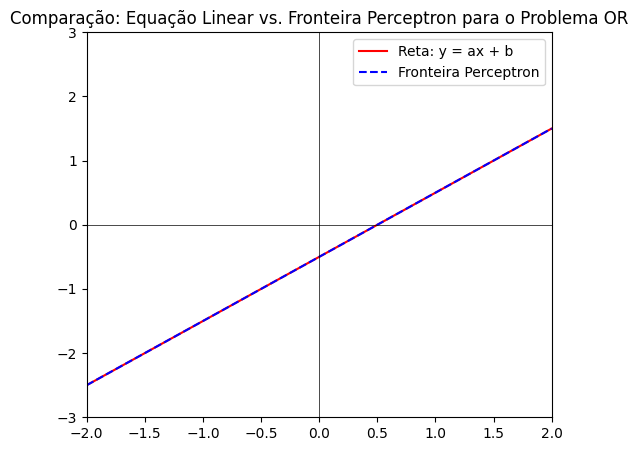

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Definição da reta na forma y = ax + b (a reta de decisão do problema OR)
a = 1     # Inclinação (slope)
b = -0.5  # Intercepto (bias)

print("Equação original (regressão): y = a*x + b")
print(f"   => y = {a} * x + ({b})\n")

# 2) Geramos valores de x
x_vals = np.linspace(-2, 2, 50)  # Intervalo de x de -2 a 2
y_vals = a * x_vals + b          # Cálculo da reta na forma clássica

# 3) Convertendo para formato perceptron
w1 = a
w2 = -1
b_perc = b

print("Equação no formato perceptron: w1*x1 + w2*x2 + b_perc = 0")
print(f"   => {w1} * x1 + {w2} * x2 + ({b_perc}) = 0\n")

# 4) Isolando x2 na equação do Perceptron
x2_vals = -(b_perc + w1 * x_vals) / w2  # Isso nos dá a mesma reta

# 5) Plotando
plt.figure(figsize=(6, 5))
plt.plot(x_vals, y_vals, 'r-', label="Reta: y = ax + b")
plt.plot(x_vals, x2_vals, 'b--', label="Fronteira Perceptron")

plt.axhline(0, color='black', linewidth=0.5)  # eixo X
plt.axvline(0, color='black', linewidth=0.5)  # eixo Y

plt.xlim(-2, 2)
plt.ylim(-3, 3)

plt.title("Comparação: Equação Linear vs. Fronteira Perceptron para o Problema OR")
plt.legend()
plt.show()


*Portanto*, podemos concluir que, a partir da equação

$$
x_2 = -\frac{(b + w_1 x_1)}{w_2} \Longrightarrow x_2 = -\frac{b}{w_2} - \frac{w_1}{w_2}x_1 \Longrightarrow y = -\frac{b}{w_2} - \frac{w_1}{w_2}x
$$

1. **$w_2$ controla a inclinação da reta**

   - A inclinação é dada por
     $$
     -\dfrac{w_1}{\,w_2\,} = a
     $$
   - Se $\lvert w_2 \rvert$ é grande (mantendo $w_1$ fixo), o valor da inclinação se aproxima de zero (a reta fica mais horizontal).
   - Se $\lvert w_2 \rvert$ é pequena (mantendo $w_1$ fixo), a inclinação aumenta em módulo (reta mais inclinada ou vertical).

   Ou seja, $w_2$ regula o quão inclinada a reta será.

2. **$w_2$ controla a direção (subindo ou descendo)**
Vejamos o sinal de $w_2$ :
   - Se $w_2 > 0$, então $-\frac{w_1}{w_2}$ será negativo → a reta fica inclinada para baixo ↘.
   - Se $w_2 < 0$, então $-\frac{w_1}{w_2}$ será positivo → a reta fica inclinada para cima ↗.
Portanto:
- Se $w_2$ é positivo, a reta desce ↘.
- Se $w_2$ é negativo, a reta sobe ↗.

3. **$w_2$ afeta o deslocamento no eixo $x_2$**  
O intercepto da reta no eixo $x_2$ (isto é, onde a reta cruza o eixo $x_2$ e $x_1 = 0$) é dado por:
     $$
     \text{intercepto em }x_2
     \;=\;
     -\dfrac{b}{\,w_2\,}.
     $$
   Isso significa que:
      - Se $\lvert w_2 \rvert$ é grande, $-\frac{b}{w_2}$ será pequeno e esse intercepto se aproxima de 0 (mais próximo do eixo $x_1$).
      - Se $\lvert w_2 \rvert$ é pequeno, $-\frac{b}{w_2}$ cresce em módulo (será grande) e a reta se afasta do eixo $x_1$.

$$
\boxed{
\text{Em resumo, } w_2 \text{ determina a inclinação, o sentido e o deslocamento vertical da reta.}
}
$$

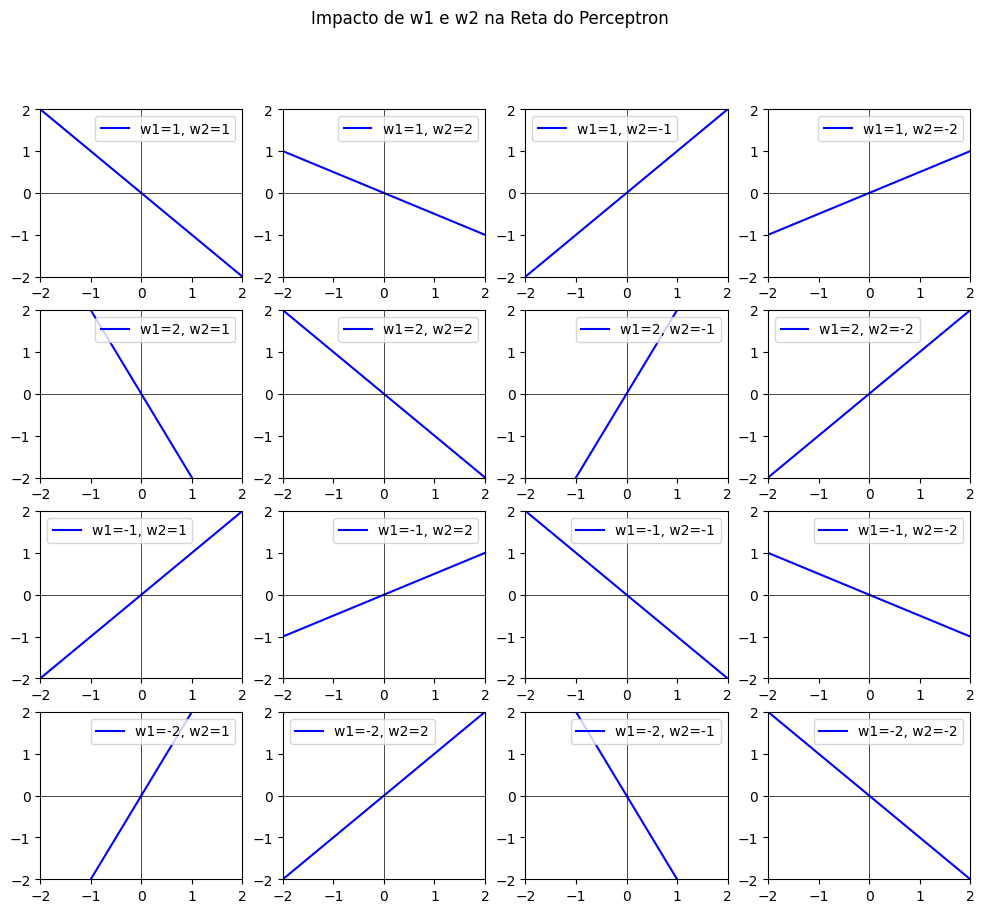

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos pesos e bias
w1_values = [1, 2, -1, -2]  # Diferentes valores de w1 para testar
w2_values = [1, 2, -1, -2]  # Diferentes valores de w2 para testar
b = 0  # Bias fixo para facilitar a análise

# Definição do intervalo de x1
x1_vals = np.linspace(-2, 2, 50)

# Criar subplots para visualizar diferentes configurações de w1 e w2
fig, axes = plt.subplots(len(w1_values), len(w2_values), figsize=(12, 10))

for i, w1 in enumerate(w1_values):
    for j, w2 in enumerate(w2_values):
        ax = axes[i, j]
        if abs(w2) > 1e-9:  # Evitar divisão por zero
            x2_vals = -(b + w1 * x1_vals) / w2
            ax.plot(x1_vals, x2_vals, 'b-', label=f"w1={w1}, w2={w2}")
            ax.axhline(0, color='black', linewidth=0.5)  # Eixo X
            ax.axvline(0, color='black', linewidth=0.5)  # Eixo Y
            ax.set_xlim(-2, 2)
            ax.set_ylim(-2, 2)
            ax.legend()

plt.suptitle("Impacto de w1 e w2 na Reta do Perceptron")
plt.show()

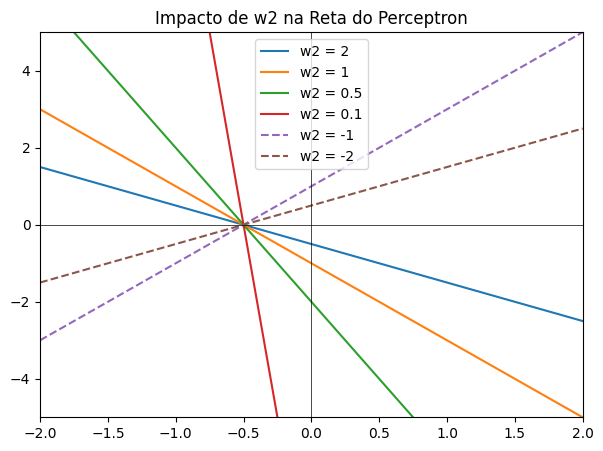

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixamos um valor para w1 e b
w1 = 2
b = 1

# Testamos diferentes valores de w2
w2_values = [2, 1, 0.5, 0.1, -1, -2]

# Criamos um conjunto de x1 (horizontal)
x1_vals = np.linspace(-2, 2, 50)

plt.figure(figsize=(7,5))
for w2 in w2_values:
    # Calculamos x2 para cada w2
    x2_vals = -(b + w1*x1_vals)/w2

    # Definimos um estilo de linha baseado no sinal de w2
    linestyle = '-' if w2 > 0 else '--'
    plt.plot(x1_vals, x2_vals, linestyle, label=f"w2 = {w2}")

# Adicionamos eixos e legenda
plt.axhline(0, color='black', linewidth=0.5)  # eixo X
plt.axvline(0, color='black', linewidth=0.5)  # eixo Y
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.legend()
plt.title("Impacto de w2 na Reta do Perceptron")
plt.show()




#### 3.2.1 Problema do OR - Rede Neural implementada do zero usando `NumPy`

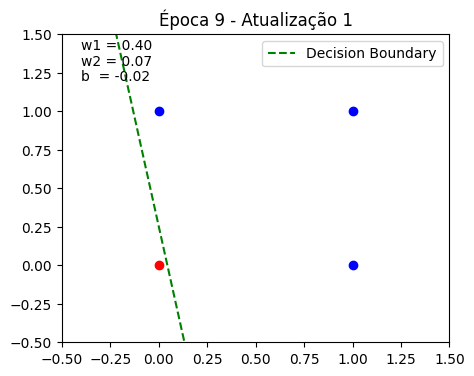

Época 9, Erros: 1
Época 10, Erros: 0
Convergência alcançada após 10 épocas.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA OR
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 1, 1, 1], dtype=float)  # Saída esperada para o OR

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1          # Taxa de aprendizado (eta).
max_epochs = 10   # Número máximo de épocas de treinamento.

# Pesos e bias (inicializados aleatoriamente).
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    """
    Retorna 1 se z >= 0, caso contrário 0.
    """
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUNÇÃO PARA PLOTAR A FRONTEIRA DE DECISÃO
# -------------------------------------------------------
def plot_decision_boundary(W, b, X, y, epoch, update_i):
    """
    Plota os pontos (X, y) e a reta dada por:
      w1*x1 + w2*x2 + b = 0  =>  x2 = -(b + w1*x1)/w2
    Parâmetros:
      - W, b: pesos atuais do Perceptron e o bias.
      - X, y: dados de entrada e suas respectivas classes.
      - epoch: época atual (para exibir no título).
      - update_i: índice de atualização dentro da época atual.
    """
    plt.figure(figsize=(5,4))

    # 4.1) Plotando pontos (vermelho = classe 0, azul = classe 1)
    for i, (x_pt, label) in enumerate(zip(X, y)):
        if label == 0:
            plt.plot(x_pt[0], x_pt[1], 'ro')
        else:
            plt.plot(x_pt[0], x_pt[1], 'bo')

    # 4.2) Gerar reta (Decision Boundary) se w2 != 0
    x_vals = np.linspace(-0.5, 1.5, 50)
    if abs(W[1]) > 1e-9:
        y_vals = -(b + W[0]*x_vals) / W[1]
        plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

    # 4.3) Ajustes de exibição
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    # 4.4) Anota na figura os valores atuais de w1, w2, b
    w1_txt = f"w1 = {W[0]:.2f}"
    w2_txt = f"w2 = {W[1]:.2f}"
    b_txt  = f"b  = {b:.2f}"
    plt.text(0.05, 0.95, w1_txt, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.90, w2_txt, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.85, b_txt,  transform=plt.gca().transAxes, fontsize=10, color='black')

    plt.title(f"Época {epoch} - Atualização {update_i}")
    plt.legend()
    plt.show()


# -------------------------------------------------------
# 5) TREINAMENTO + ANIMAÇÃO
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0  # contador de erros nessa época
    for i in range(len(X)):
        # 5.1) Forward: cálculo z = (w1*x1 + w2*x2 + b)
        z = np.dot(X[i], W) + b

        # 5.2) y_pred = step_function(z)
        y_pred = step_function(z)

        # 5.3) Erro e = (y_verdadeiro - y_predito)
        e = y[i] - y_pred

        # 5.4) Ajuste de pesos (Regra do Perceptron) se e != 0
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1

            # Gerar animação (limpa o plot anterior, gera o plot novo)
            clear_output(wait=True)
            plot_decision_boundary(W, b, X, y, epoch, update_i=i+1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")

    # Se zero erros nesta época, significa convergência, interrompe o treinamento
    if error_count == 0:
        print(f"Convergência alcançada após {epoch} épocas.")
        break


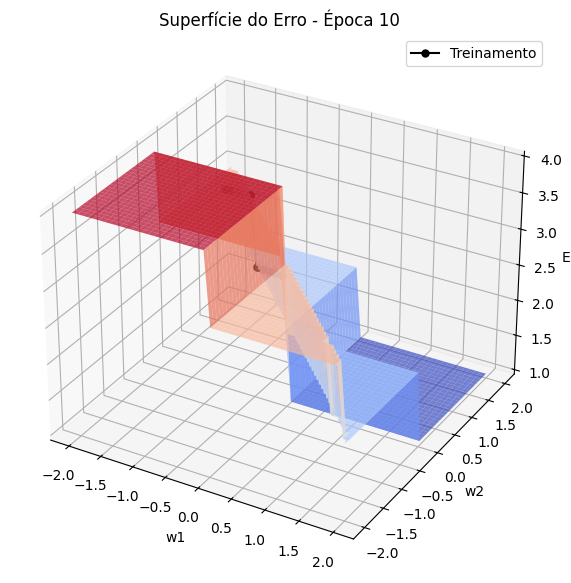

Época 10, Erros: 1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA OR
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 1, 1, 1], dtype=float)  # Saída para a porta OR

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1          # Taxa de aprendizado
max_epochs = 10   # Número máximo de épocas de treinamento

# Inicialização aleatória de pesos e bias
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUNÇÃO DE ERRO DO PERCEPTRON
# -------------------------------------------------------
def perceptron_error(W1, W2, b, X, y):
    errors = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b
        y_pred = step_function(z)
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 5) TREINAMENTO + ANIMAÇÃO COM SUPERFÍCIE DE ERRO
# -------------------------------------------------------
w1_range = np.linspace(-2, 2, 50)
w2_range = np.linspace(-2, 2, 50)
error_surface = np.zeros((len(w1_range), len(w2_range)))

# Preencher a superfície de erro
b_fixed = 0
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        error_surface[i, j] = perceptron_error(w1, w2, b_fixed, X, y)

W_path = []  # Para armazenar o caminho dos pesos ao longo do treinamento

epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0
    for i in range(len(X)):
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)
        e = y[i] - y_pred

        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1
            W_path.append((W[0], W[1]))

            # Atualiza a visualização
            clear_output(wait=True)
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
            ax.plot_surface(W1_grid, W2_grid, error_surface.T, cmap='coolwarm', alpha=0.7)

            # Plota o caminho percorrido pelos pesos
            if len(W_path) > 1:
                W1_vals, W2_vals = zip(*W_path)
                errors_vals = [perceptron_error(w1, w2, b_fixed, X, y) for w1, w2 in W_path]
                ax.plot(W1_vals, W2_vals, errors_vals, marker='o', color='black', markersize=5, label="Treinamento")

            ax.set_xlabel("w1")
            ax.set_ylabel("w2")
            ax.set_zlabel("Erro")
            ax.set_title(f"Superfície do Erro - Época {epoch}")
            plt.legend()
            plt.show()
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    if error_count == 0:
        break


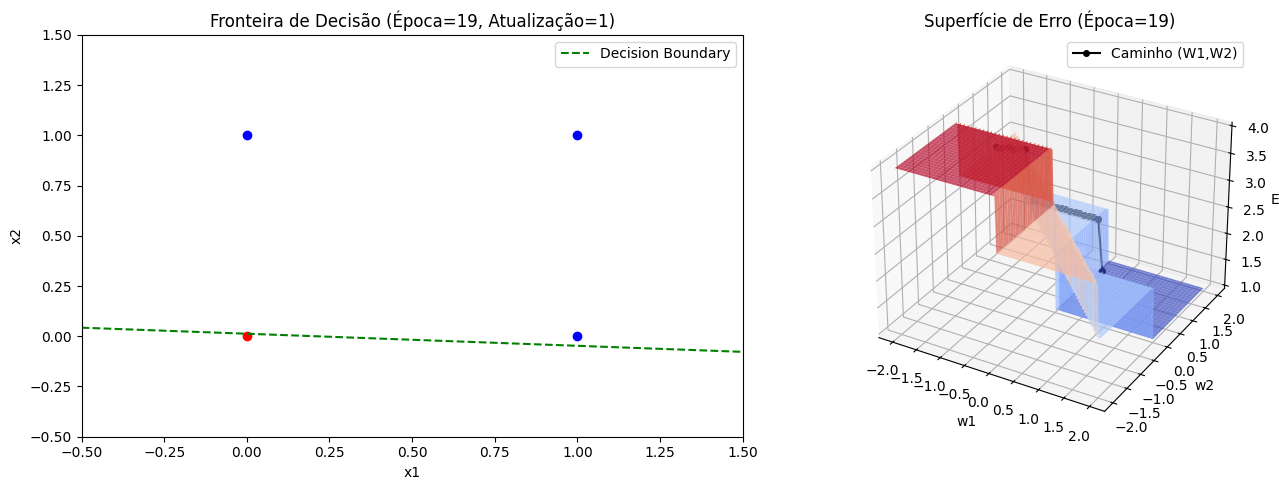

Época 19, Erros: 1
Época 20, Erros: 0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA OR
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 1, 1, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1        # Taxa de aprendizado
max_epochs = 20 # Número máximo de épocas

# Pesos (w1, w2) e bias inicializados aleatoriamente
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUNÇÃO DE ERRO DO PERCEPTRON (SUPERFÍCIE)
#    Usada para plotar a superfície de erro (fixando b=0).
# -------------------------------------------------------
def perceptron_error(W1, W2, b_fixed, X, y):
    errors = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b_fixed
        y_pred = step_function(z)
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 5) PREPARANDO A SUPERFÍCIE DE ERRO 3D
# -------------------------------------------------------
N = 200  # Resolução da superfície (200x200 pontos)
w1_range = np.linspace(-2, 2, N)
w2_range = np.linspace(-2, 2, N)
error_surface = np.zeros((len(w1_range), len(w2_range)))

b_fixed = 0  # Usado somente para calcular a superfície
for i, w1_val in enumerate(w1_range):
    for j, w2_val in enumerate(w2_range):
        error_surface[i, j] = perceptron_error(w1_val, w2_val, b_fixed, X, y)

# -------------------------------------------------------
# Para armazenar o caminho dos pesos (w1, w2) ao longo do
# treinamento, conforme forem sendo atualizados.
# -------------------------------------------------------
W_path = [(W[0], W[1])]  # começa com o valor inicial

# -------------------------------------------------------
# 6) FUNÇÃO para plotar (A) Fronteira de Decisão (2D) e
#                         (B) Superfície de Erro (3D)
# -------------------------------------------------------
def plot_all(W, b, X, y, W_path, epoch, update_i):
    """
    Gera uma única figura com 2 subplots:
      - Subplot 1 (esquerda): Fronteira de decisão em 2D
      - Subplot 2 (direita): Superfície de erro em 3D + caminho (W_path)
    """
    fig = plt.figure(figsize=(14, 5))

    # -----------------------------------------------
    # Subplot 1: Fronteira de decisão em 2D
    # -----------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)

    # Plotando os pontos (vermelho = classe 0, azul = classe 1)
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')

    # Reta de decisão se w2 != 0
    if abs(W[1]) > 1e-9:
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = -(b + W[0] * x_vals)/W[1]
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()

    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_title(f"Fronteira de Decisão (Época={epoch}, Atualização={update_i})")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    # -----------------------------------------------
    # Subplot 2: Superfície de erro em 3D
    # -----------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    # Plota a superfície de erro
    W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
    ax2.plot_surface(W1_grid, W2_grid, error_surface.T, cmap='coolwarm', alpha=0.7)

    # Caminho percorrido no plano (w1,w2)
    if len(W_path) > 0:
        W1_vals, W2_vals = zip(*W_path)
        error_vals = [perceptron_error(w1p, w2p, b_fixed, X, y)
                      for (w1p, w2p) in W_path]
        ax2.plot(W1_vals, W2_vals, error_vals,
                 marker='o', color='black', markersize=4,
                 label="Caminho (W1,W2)")

    ax2.set_xlabel("w1")
    ax2.set_ylabel("w2")
    ax2.set_zlabel("Erro")
    ax2.set_title(f"Superfície de Erro (Época={epoch})")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 7) LOOP DE TREINAMENTO + ANIMAÇÃO DUPLA
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0

    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)

        # Erro
        e = y[i] - y_pred

        # Ajuste de pesos (Regra do Perceptron) se houve erro
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1

            # Salva o novo (w1, w2) no caminho
            W_path.append((W[0], W[1]))

            # Gera animação (limpa output anterior, depois plota)
            clear_output(wait=True)
            plot_all(W, b, X, y, W_path, epoch, update_i=i+1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    # Se não houve nenhum erro nesta época, convergiu
    if error_count == 0:
        break


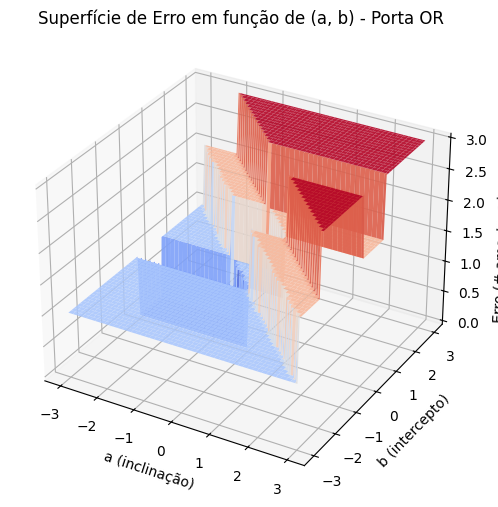

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------------------------
# 1) DADOS: PORTA OR
# ----------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 1, 1, 1], dtype=float)

# ----------------------------------------------------------
# 2) FUNÇÃO DE PREDIÇÃO USANDO (a, b) EM x2 >= a*x1 + b
#    Se x2 >= a*x1 + b, prevê classe 1; caso contrário, 0.
# ----------------------------------------------------------
def step_predict(a, b, x):
    """
    Retorna 1 se x2 >= a*x1 + b, senão 0.
    """
    x1, x2 = x
    return 1 if (x2 >= a*x1 + b) else 0

# ----------------------------------------------------------
# 3) FUNÇÃO DE ERRO: CONTA QUANTAS AMOSTRAS SÃO CLASSIFICADAS
#    INCORRETAMENTE PELO PAR (a, b).
# ----------------------------------------------------------
def classification_error(a, b, X, y):
    errors = 0
    for i in range(len(X)):
        y_pred = step_predict(a, b, X[i])
        if y_pred != y[i]:
            errors += 1
    return errors

# ----------------------------------------------------------
# 4) CONSTRUÇÃO DA SUPERFÍCIE DE ERRO (a, b) -> erro
#    a e b vão variar em intervalos escolhidos (por exemplo, [-3, 3]).
# ----------------------------------------------------------
N = 100  # resolução da malha
a_vals = np.linspace(-3, 3, N)
b_vals = np.linspace(-3, 3, N)

# Matriz para armazenar o erro
error_surface = np.zeros((N, N))

# Para cada (a, b) no grid, calcule quantas amostras o classificador erra
for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error(a_, b_, X, y)

# ----------------------------------------------------------
# 5) PLOT DA SUPERFÍCIE DE ERRO 3D
# ----------------------------------------------------------
A, B = np.meshgrid(a_vals, b_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Transpomos error_surface pois meshgrid(A,B) tem forma (N,N) casando com [j,i]
ax.plot_surface(A, B, error_surface.T, cmap='coolwarm', alpha=0.9)

ax.set_xlabel('a (inclinação)')
ax.set_ylabel('b (intercepto)')
ax.set_zlabel('Erro (# amostras incorretas)')
ax.set_title('Superfície de Erro em função de (a, b) - Porta OR')

plt.show()


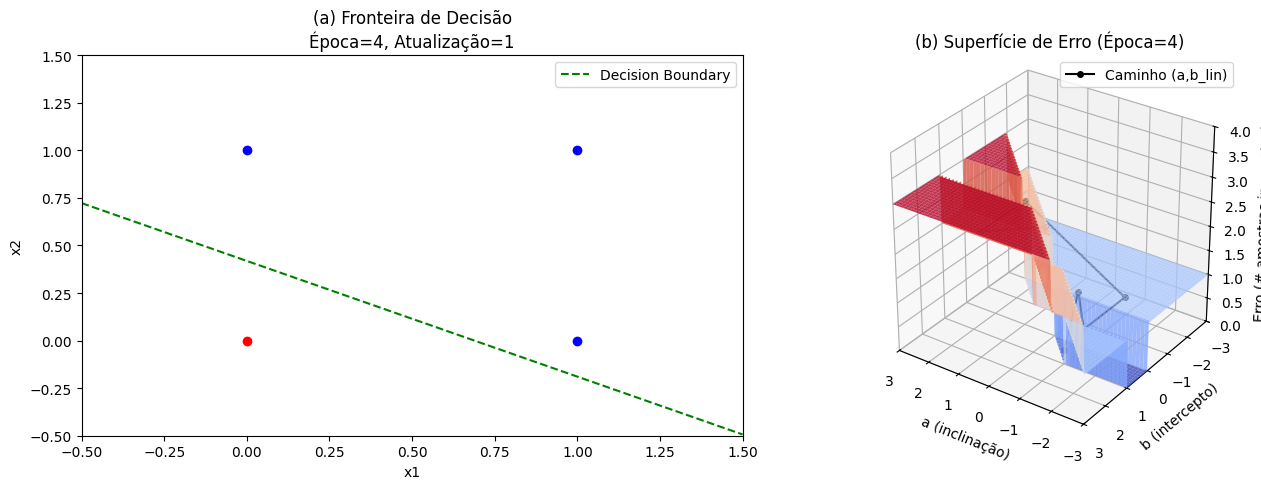

Época 4, Erros: 1
Época 5, Erros: 0


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA OR
# -------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 1, 1, 1], dtype=float)  # Saída da porta OR

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.1         # Taxa de aprendizado
max_epochs = 30   # Número máximo de épocas

# Pesos iniciais (w1, w2) e bias (b)
W = np.random.randn(2)  # (w1, w2)
b = np.random.randn()   # bias

# -------------------------------------------------------
# 3) FUNÇÃO STEP (DEGRAU)
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) CONVERSÃO DE (w1, w2, b) -> (a, b_lin)
#    Reta: w1*x1 + w2*x2 + b = 0  =>  x2 = - (b + w1*x1)/w2
#    Logo: a = -w1/w2,  b_lin = -b/w2
# -------------------------------------------------------
def w2ab(w1, w2, b):
    """
    Converte pesos do Perceptron para (a, b_lin):
      x2 = a*x1 + b_lin
    Se w2 ~ 0, a e b_lin ficam indefinidos;
    aqui assumimos que não vai acontecer no treinamento
    (caso contrário, tratar a parte).
    """
    if abs(w2) < 1e-9:
        # Evita divisão por zero (ou quase zero).
        return None, None
    a_slope = -w1 / w2
    b_lin   = -b   / w2
    return a_slope, b_lin

# -------------------------------------------------------
# 5) CÁLCULO DE ERRO USANDO (a, b_lin)
#    Classifica: se x2 >= a*x1 + b_lin => 1, senão 0
# -------------------------------------------------------
def classification_error_ab(a, b_lin, X, y):
    errors = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y_pred = 1 if (x2 >= a*x1 + b_lin) else 0
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 6) CRIANDO A SUPERFÍCIE DE ERRO EM (a, b_lin)
#    Geramos a e b_lin em intervalos pré-definidos.
# -------------------------------------------------------
N = 200  # Resolução do grid
a_vals  = np.linspace(-3, 3, N)
b_vals  = np.linspace(-3, 3, N)

error_surface = np.zeros((N, N))

for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error_ab(a_, b_, X, y)

# -------------------------------------------------------
# 7) LISTA PARA ARMAZENAR O CAMINHO (a, b_lin) AO LONGO
#    DO TREINAMENTO NO ESPAÇO DE PARÂMETROS.
# -------------------------------------------------------
AB_path = []

# Guarda o (a,b_lin) inicial (caso w2 não seja ~0)
a0, b0 = w2ab(W[0], W[1], b)
AB_path.append((a0, b0))

# -------------------------------------------------------
# 8) FUNÇÃO PARA PLOTAR DOIS SUBPLOTS:
#    (1) Fronteira de decisão em 2D  (a,b_lin)
#    (2) Superfície de erro 3D       (a,b_lin, erro)
# -------------------------------------------------------
def plot_all_ab(W, b, X, y, AB_path, epoch, update_i):
    """
    Subplot (1): Plot dos dados e a reta x2 = a*x1 + b_lin
    Subplot (2): Plot 3D da superfície no espaço (a,b_lin)
                 + caminho percorrido (AB_path).
    """
    # Converte w1,w2,b => a, b_lin
    a_slope, b_lin = w2ab(W[0], W[1], b)

    fig = plt.figure(figsize=(14, 5))

    # ---------------------------------------------------
    # Subplot 1: Fronteira de decisão no plano (x1,x2)
    # ---------------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)

    # Plotando os pontos
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')

    # Se a_slope,b_lin forem válidos => plota a reta
    if (a_slope is not None) and (b_lin is not None):
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = a_slope*x_vals + b_lin
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()

    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_title(f"(a) Fronteira de Decisão\nÉpoca={epoch}, Atualização={update_i}")

    # ---------------------------------------------------
    # Subplot 2: Superfície de erro em (a,b_lin)
    # ---------------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.view_init(elev=30, azim=125)  # ROTACIONA A VISUALIZAÇÃO

    A_grid, B_grid = np.meshgrid(a_vals, b_vals)
    # Usar contour3D ou plot_surface
    ax2.plot_surface(A_grid, B_grid, error_surface.T, cmap='coolwarm', alpha=0.8)
    ax2.dist = 8  # Aproxima a câmera (zoom in)
    ax2.set_proj_type('persp')  # ou 'persp'
    ax2.set_box_aspect((1,1,1))
    ax2.set_xlim3d(-3, 3)
    ax2.set_ylim3d(-3, 3)
    ax2.set_zlim3d(0, 4)

    # Plota o caminho percorrido
    if len(AB_path) > 0:
        A_list, B_list = zip(*AB_path)
        E_list = [classification_error_ab(a_, b_, X, y) for (a_, b_) in AB_path]
        ax2.plot(A_list, B_list, E_list, 'ko-', label="Caminho (a,b_lin)", markersize=4)

    ax2.set_xlabel("a (inclinação)")
    ax2.set_ylabel("b (intercepto)")
    ax2.set_zlabel("Erro (# amostras incorretas)")
    ax2.set_title(f"(b) Superfície de Erro (Época={epoch})")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 9) LOOP DE TREINAMENTO DO PERCEPTRON
#    Mas a superfície será plotada em (a,b_lin).
# -------------------------------------------------------
for epoch in range(1, max_epochs+1):
    error_count = 0

    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)

        # Erro
        e = y[i] - y_pred

        # Se houve erro => atualiza (w1,w2,b)
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1

            # Converte p/ (a,b_lin) e salva no caminho
            a_curr, b_curr = w2ab(W[0], W[1], b)
            AB_path.append((a_curr, b_curr))

            # Animação: limpa, plota
            clear_output(wait=True)
            plot_all_ab(W, b, X, y, AB_path, epoch, update_i=i+1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    if error_count == 0:
        break


# -------------------------------------------------------
# 6) TESTES FINAIS
# -------------------------------------------------------
print("\n--- Teste do Perceptron para OR ---")
for i, x_pt in enumerate(X):
    z = np.dot(x_pt, W) + b
    y_pred = step_function(z)
    print(f"Entrada {x_pt}, Saída Predita: {y_pred}, Real: {y[i]}")

print("\nPesos finais:", W)
print("Bias final:", b)

### 3.3 Alterando a Função de Custo e Ativação do And

Substituição da Função Step pela Sigmóide e Entropia Cruzada**

Neste código, estamos resolvendo o problema da porta lógica **AND** usando um **Perceptron**.  
Originalmente, o Perceptron utiliza uma função de ativação **degrau (step function)**, que retorna **1** se a entrada for maior ou igual a zero, e **0** caso contrário.  

Essa função é simples, mas tem uma limitação: **ela não é diferenciável**, o que dificulta o uso de técnicas de otimização mais avançadas.

Para melhorar o aprendizado do modelo, fizemos **duas mudanças importantes**:

✅ **Substituímos a função degrau pela função sigmóide**  
✅ **Introduzimos a entropia cruzada como função de custo**  

---

 **1. Função Sigmóide**  

A função **sigmóide** é uma função de ativação **não linear** que mapeia qualquer valor real para um valor entre **0 e 1**. Ela é definida como:  

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Onde \( z \) é a soma ponderada das entradas:

\[
z = w_1 x_1 + w_2 x_2 + b
\]

A sigmóide possui as seguintes características:

- **Suave e diferenciável** → Permite otimização via gradiente.  
- **Interpretação probabilística** → A saída pode ser interpretada como uma **probabilidade**:

  - Se \( \sigma(z) \geq 0.5 \), a saída é considerada **1** (classe positiva).  
  - Se \( \sigma(z) < 0.5 \), a saída é considerada **0** (classe negativa).

 **2. Entropia Cruzada**  

A **entropia cruzada** é uma função de custo usada para medir a diferença entre a **previsão do modelo** e o **rótulo verdadeiro**. Para um único exemplo, ela é definida como:  

**Entropia Cruzada Binária (Binary Cross-Entropy – BCE)**:    
  $$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)\right]
  $$
  - Adequada para problemas de classificação binária (ativação sigmoid na saída).

A entropia cruzada **penaliza previsões erradas**, especialmente quando o modelo está **muito confiante** em uma previsão incorreta. Isso faz com que o treinamento seja mais eficiente.  

- **Se a previsão for muito errada** (próxima de 0 quando deveria ser 1, ou vice-versa), a penalização será **alta**.  
- **Se a previsão for correta** (próxima de 1 quando deveria ser 1), a penalização será **baixa**.  




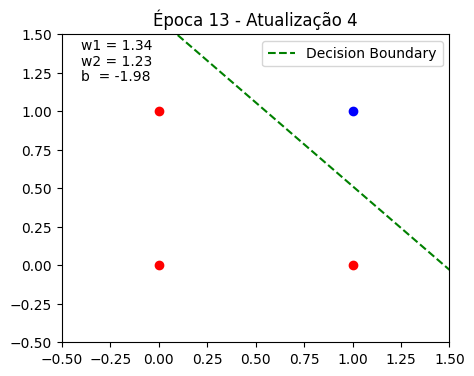

Época 13, Erros: 0, Perda Média: 0.3990
Convergência alcançada!


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Dados de treinamento: porta AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)

# Hiperparâmetros
lr = 0.4         # Taxa de aprendizado
max_epochs = 15  # Número máximo de épocas

# Inicialização aleatória dos pesos e bias (valores pequenos)
W = np.random.randn(2) * 0.01  # Pesos (w1, w2)
b = np.random.randn() * 0.01    # Bias

# Função Sigmóide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função de Entropia Cruzada
def cross_entropy_loss(y_true, y_pred):
    # Evita log(0) ou log(1) para evitar problemas numéricos
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Função para plotar a fronteira de decisão
def plot_decision_boundary(W, b, X, y, epoch, update_i):
    plt.figure(figsize=(5, 4))
    for i, (x_pt, label) in enumerate(zip(X, y)):
        plt.plot(x_pt[0], x_pt[1], 'ro' if label == 0 else 'bo')
    x_vals = np.linspace(-0.5, 1.5, 50)
    if abs(W[1]) > 1e-9:
        y_vals = -(b + W[0] * x_vals) / W[1]
        plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.text(0.05, 0.95, f"w1 = {W[0]:.2f}", transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.05, 0.90, f"w2 = {W[1]:.2f}", transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.05, 0.85, f"b  = {b:.2f}", transform=plt.gca().transAxes, fontsize=10)
    plt.title(f"Época {epoch} - Atualização {update_i}")
    plt.legend()
    plt.show()

# Treinamento
epoch = 0
for epoch in range(1, max_epochs + 1):
    error_count = 0
    total_loss = 0  # Para calcular a perda média por época
    for i in range(len(X)):
        # Forward pass
        z = np.dot(X[i], W) + b
        y_pred = sigmoid(z)

        # Cálculo da perda (entropia cruzada)
        loss = cross_entropy_loss(y[i], y_pred)
        total_loss += loss

        # Cálculo do gradiente
        e = y_pred - y[i]  # Derivada da entropia cruzada em relação a z
        grad_W = e * X[i]  # Gradiente em relação aos pesos
        grad_b = e         # Gradiente em relação ao bias

        # Atualização dos pesos e bias
        W -= lr * grad_W
        b -= lr * grad_b

        # Verifica se a previsão está incorreta
        if abs(e) > 0.5:  # Considera um erro se a diferença for significativa
            error_count += 1

        # Plotagem da fronteira de decisão a cada atualização
        clear_output(wait=True)
        plot_decision_boundary(W, b, X, y, epoch, update_i=i + 1)
        time.sleep(0.1)

    # Exibe a perda média e o número de erros na época
    print(f"Época {epoch}, Erros: {error_count}, Perda Média: {total_loss / len(X):.4f}")
    if error_count == 0:
        print("Convergência alcançada!")
        break


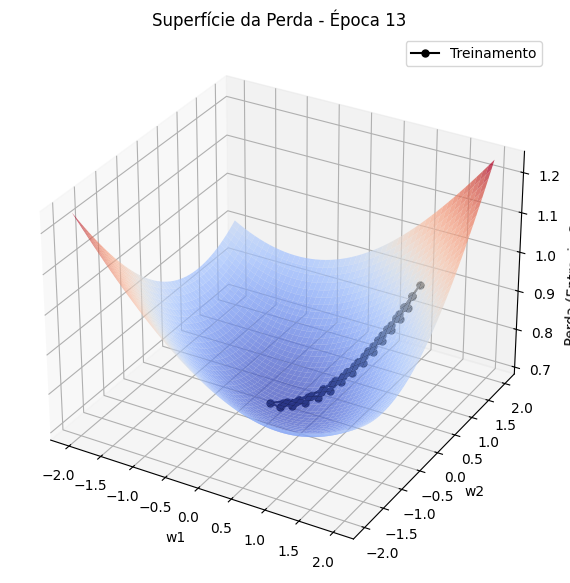

Época 13, Erros: 0
Convergência alcançada!


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
# X: entradas; y: saída esperada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.4          # Taxa de aprendizado (eta). Valor que controla o passo de ajuste.
max_epochs = 15   # Número máximo de épocas de treinamento (iteradas completas nos dados).

# Pesos e bias (inicializados aleatoriamente).
W = np.random.randn(2) * 0.01  # w1, w2 (inicializados com valores pequenos)
b = np.random.randn() * 0.01    # bias (inicializado com valor pequeno)

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO SIGMOIDE
# -------------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -------------------------------------------------------
# 4) FUNÇÃO DE CUSTO: ENTROPIA CRUZADA
# -------------------------------------------------------
def cross_entropy_loss(y_true, y_pred):
    # Evita log(0) ou log(1) para evitar problemas numéricos
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# -------------------------------------------------------
# 5) FUNÇÃO PARA CALCULAR A PERDA TOTAL (ENTROPIA CRUZADA)
# -------------------------------------------------------
def calculate_total_loss(W1, W2, b, X, y):
    total_loss = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b
        y_pred = sigmoid(z)
        total_loss += cross_entropy_loss(y[i], y_pred)
    return total_loss / len(X)  # Retorna a perda média

# -------------------------------------------------------
# 6) TREINAMENTO + ANIMAÇÃO COM SUPERFÍCIE DE ERRO
# -------------------------------------------------------
w1_range = np.linspace(-2, 2, 50)
w2_range = np.linspace(-2, 2, 50)
loss_surface = np.zeros((len(w1_range), len(w2_range)))

# Preencher a superfície de perda (entropia cruzada)
b_fixed = 0
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        loss_surface[i, j] = calculate_total_loss(w1, w2, b_fixed, X, y)

W_path = []  # Para armazenar o caminho dos pesos ao longo do treinamento

epoch = 0
for epoch in range(1, max_epochs + 1):
    error_count = 0
    for i in range(len(X)):
        # Forward pass
        z = np.dot(X[i], W) + b
        y_pred = sigmoid(z)

        # Cálculo do gradiente
        e = y_pred - y[i]  # Derivada da entropia cruzada em relação a z
        grad_W = e * X[i]  # Gradiente em relação aos pesos
        grad_b = e         # Gradiente em relação ao bias

        # Atualização dos pesos e bias
        W -= lr * grad_W
        b -= lr * grad_b

        # Verifica se a previsão está incorreta
        if abs(e) > 0.5:  # Considera um erro se a diferença for significativa
            error_count += 1

        # Armazena o caminho dos pesos
        W_path.append((W[0], W[1]))

        # Atualiza a visualização
        clear_output(wait=True)
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
        ax.plot_surface(W1_grid, W2_grid, loss_surface.T, cmap='coolwarm', alpha=0.7)

        # Plota o caminho percorrido pelos pesos
        if len(W_path) > 1:
            W1_vals, W2_vals = zip(*W_path)
            loss_vals = [calculate_total_loss(w1, w2, b_fixed, X, y) for w1, w2 in W_path]
            ax.plot(W1_vals, W2_vals, loss_vals, marker='o', color='black', markersize=5, label="Treinamento")

        ax.set_xlabel("w1")
        ax.set_ylabel("w2")
        ax.set_zlabel("Perda (Entropia Cruzada)")
        ax.set_title(f"Superfície da Perda - Época {epoch}")
        plt.legend()
        plt.show()
        time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    if error_count == 0:
        print("Convergência alcançada!")
        break

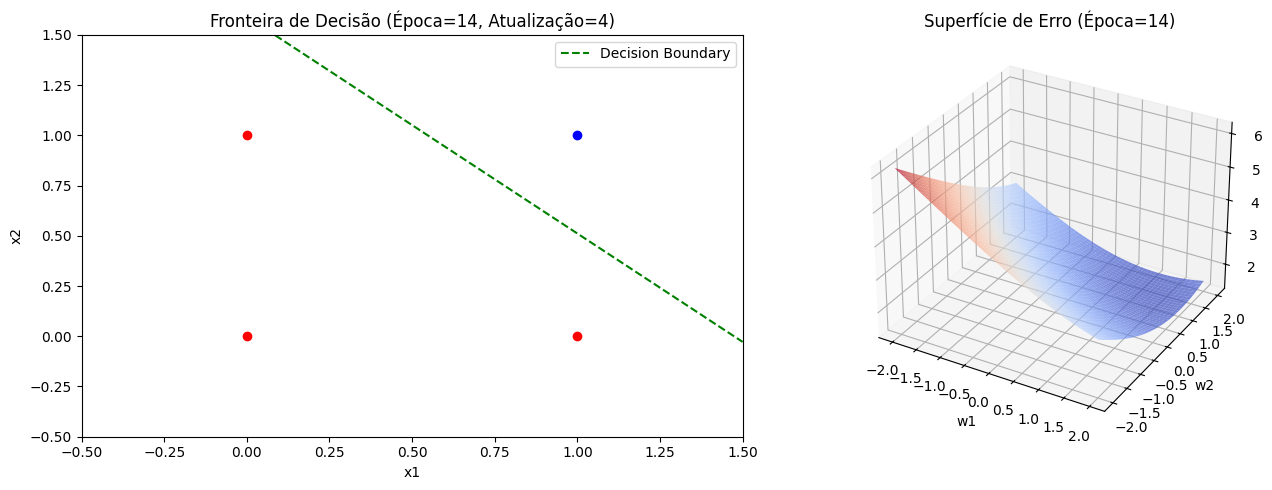

Época 14, Erros: 0, Perda Média: 0.3852
Convergência alcançada!


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.4        # Taxa de aprendizado
max_epochs = 15 # Número máximo de épocas

# Pesos (w1, w2) e bias inicializados aleatoriamente
W = np.random.randn(2) * 0.01   # w1, w2
b = np.random.randn()  * 0.01  # bias

# -------------------------------------------------------
# 3) FUNÇÃO DE ATIVAÇÃO SIGMOIDE
# -------------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -------------------------------------------------------
# 4) FUNÇÃO DE PERDA - ENTROPIA CRUZADA
# -------------------------------------------------------
def cross_entropy_loss(y_true, y_pred):
    # Evita log(0) ou log(1) para evitar problemas numéricos
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# -------------------------------------------------------
# 5) FUNÇÃO PARA PLOTAR (A) Fronteira de Decisão (2D) e
#                         (B) Superfície de Erro (3D)
# -------------------------------------------------------
def plot_all(W, b, X, y, epoch, update_i):
    """
    Gera uma única figura com 2 subplots:
      - Subplot 1 (esquerda): Fronteira de decisão em 2D
      - Subplot 2 (direita): Superfície de erro em 3D + caminho (W_path)
    """
    fig = plt.figure(figsize=(14, 5))

    # -----------------------------------------------
    # Subplot 1: Fronteira de decisão em 2D
    # -----------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)

    # Plotando os pontos (vermelho = classe 0, azul = classe 1)
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')

    # Reta de decisão se w2 != 0
    if abs(W[1]) > 1e-9:
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = -(b + W[0] * x_vals)/W[1]
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()

    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_title(f"Fronteira de Decisão (Época={epoch}, Atualização={update_i})")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    # -----------------------------------------------
    # Subplot 2: Superfície de erro em 3D
    # -----------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    # Definir intervalo de pesos
    w1_range = np.linspace(-2, 2, 50)
    w2_range = np.linspace(-2, 2, 50)

    # Plota a superfície de erro
    W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
    error_surface = np.zeros_like(W1_grid)
    for i, w1_val in enumerate(w1_range):
        for j, w2_val in enumerate(w2_range):
            error_surface[j, i] = np.sum([cross_entropy_loss(y[i], sigmoid(w1_val * X[i][0] + w2_val * X[i][1] + b)) for i in range(len(X))])

    ax2.plot_surface(W1_grid, W2_grid, error_surface, cmap='coolwarm', alpha=0.7)

    ax2.set_xlabel("w1")
    ax2.set_ylabel("w2")
    ax2.set_zlabel("Erro")
    ax2.set_title(f"Superfície de Erro (Época={epoch})")

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 6) LOOP DE TREINAMENTO + ANIMAÇÃO DUPLA
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0
    total_loss = 0  # Para calcular a perda média por época

    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = sigmoid(z)

        # Cálculo da perda (entropia cruzada)
        loss = cross_entropy_loss(y[i], y_pred)
        total_loss += loss

        # Cálculo do gradiente
        e = y_pred - y[i]  # Derivada da entropia cruzada em relação a z
        grad_W = e * X[i]  # Gradiente em relação aos pesos
        grad_b = e         # Gradiente em relação ao bias

        # Atualização dos pesos e bias
        W -= lr * grad_W
        b -= lr * grad_b

        # Verifica se a previsão está incorreta
        if abs(e) > 0.5:  # Considera um erro se a diferença for significativa
            error_count += 1

        # Plotagem da fronteira de decisão a cada atualização
        clear_output(wait=True)
        plot_all(W, b, X, y, epoch, update_i=i + 1)
        time.sleep(0.1)

    print(f"Época {epoch}, Erros: {error_count}, Perda Média: {total_loss / len(X):.4f}")

    # Se convergiu (sem erros), para o treinamento
    if error_count == 0:
        print("Convergência alcançada!")
        break



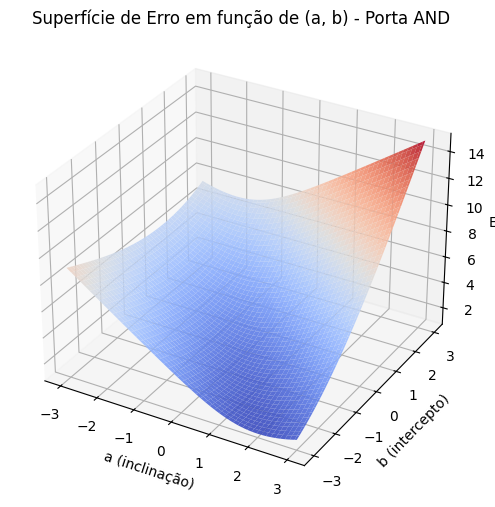

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------------------------
# 1) DADOS: PORTA AND
# ----------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# ----------------------------------------------------------
# 2) FUNÇÃO DE ATIVAÇÃO SIGMOIDE
# ----------------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ----------------------------------------------------------
# 3) FUNÇÃO DE ERRO: ENTROPIA CRUZADA
# ----------------------------------------------------------
def cross_entropy_loss(y_true, y_pred):
    # Evita log(0) ou log(1) para evitar problemas numéricos
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# ----------------------------------------------------------
# 4) CONSTRUÇÃO DA SUPERFÍCIE DE ERRO (a, b) -> erro
#    a e b vão variar em intervalos escolhidos (por exemplo, [-3, 3]).
# ----------------------------------------------------------
N = 100  # resolução da malha
a_vals = np.linspace(-3, 3, N)
b_vals = np.linspace(-3, 3, N)

# Matriz para armazenar o erro
error_surface = np.zeros((N, N))

# Para cada (a, b) no grid, calcule a perda usando a entropia cruzada
for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        y_preds = sigmoid(np.dot(X, [a_, a_]) + b_)
        error_surface[i, j] = np.sum([cross_entropy_loss(yi, y_pred) for yi, y_pred in zip(y, y_preds)])

# ----------------------------------------------------------
# 5) PLOT DA SUPERFÍCIE DE ERRO 3D
# ----------------------------------------------------------
A, B = np.meshgrid(a_vals, b_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Transpomos error_surface pois meshgrid(A,B) tem forma (N,N) casando com [j,i]
ax.plot_surface(A, B, error_surface.T, cmap='coolwarm', alpha=0.9)

ax.set_xlabel('a (inclinação)')
ax.set_ylabel('b (intercepto)')
ax.set_zlabel('Erro')
ax.set_title('Superfície de Erro em função de (a, b) - Porta AND')

plt.show()



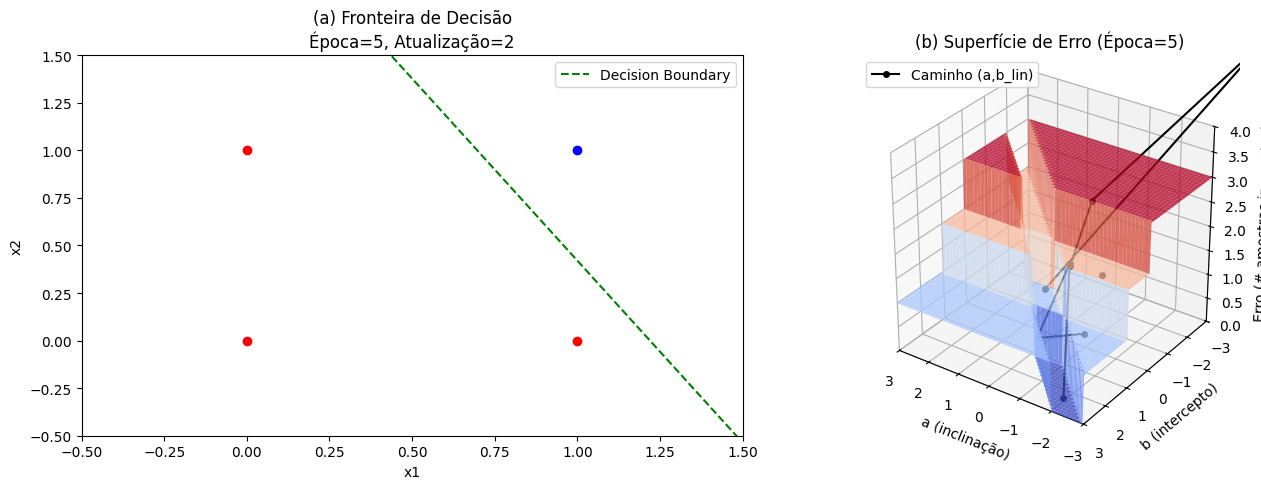

Época 5, Erros: 1
Época 6, Erros: 0


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPARÂMETROS E INICIALIZAÇÃO DE PESOS
# -------------------------------------------------------
lr = 0.4         # Taxa de aprendizado
max_epochs = 15   # Número máximo de épocas

# Inicialização dos pesos com valores pequenos
W = np.random.randn(2) * 0.01  # Pesos multiplicados por 0.01
b = np.random.randn() * 0.01   # Bias multiplicado por 0.01

# -------------------------------------------------------
# 3) FUNÇÃO SIGMOIDE E ENTROPIA CRUZADA
# -------------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def cross_entropy(y_true, y_pred):
    # Evitar valores de log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# -------------------------------------------------------
# 4) CONVERSÃO DE (w1, w2, b) -> (a, b_lin)
# -------------------------------------------------------
def w2ab(w1, w2, b):
    """
    Converte pesos do Perceptron para (a, b_lin):
      x2 = a*x1 + b_lin
    Se w2 ~ 0, a e b_lin ficam indefinidos;
    aqui assumimos que não vai acontecer no treinamento.
    """
    if abs(w2) < 1e-9:
        return None, None
    a_slope = -w1 / w2
    b_lin = -b / w2
    return a_slope, b_lin

# -------------------------------------------------------
# 5) CÁLCULO DE ERRO USANDO (a, b_lin)
# -------------------------------------------------------
def classification_error_ab(a, b_lin, X, y):
    errors = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y_pred = 1 if (x2 >= a * x1 + b_lin) else 0
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 6) CRIANDO A SUPERFÍCIE DE ERRO EM (a, b_lin)
# -------------------------------------------------------
N = 200  # Resolução do grid
a_vals = np.linspace(-3, 3, N)
b_vals = np.linspace(-3, 3, N)

error_surface = np.zeros((N, N))

for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error_ab(a_, b_, X, y)

# -------------------------------------------------------
# 7) LISTA PARA ARMAZENAR O CAMINHO (a, b_lin) AO LONGO DO TREINAMENTO
# -------------------------------------------------------
AB_path = []

# Guarda o (a,b_lin) inicial
a0, b0 = w2ab(W[0], W[1], b)
AB_path.append((a0, b0))

# -------------------------------------------------------
# 8) FUNÇÃO PARA PLOTAR OS GRÁFICOS
# -------------------------------------------------------
def plot_all_ab(W, b, X, y, AB_path, epoch, update_i):
    a_slope, b_lin = w2ab(W[0], W[1], b)

    fig = plt.figure(figsize=(14, 5))

    # Subplot 1: Fronteira de decisão no plano (x1,x2)
    ax1 = fig.add_subplot(1, 2, 1)

    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')

    if (a_slope is not None) and (b_lin is not None):
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = a_slope * x_vals + b_lin
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()

    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_title(f"(a) Fronteira de Decisão\nÉpoca={epoch}, Atualização={update_i}")

    # Subplot 2: Superfície de erro 3D
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.view_init(elev=30, azim=125)

    A_grid, B_grid = np.meshgrid(a_vals, b_vals)
    ax2.plot_surface(A_grid, B_grid, error_surface.T, cmap='coolwarm', alpha=0.8)
    ax2.dist = 8
    ax2.set_proj_type('persp')
    ax2.set_box_aspect((1, 1, 1))
    ax2.set_xlim3d(-3, 3)
    ax2.set_ylim3d(-3, 3)
    ax2.set_zlim3d(0, 4)

    if len(AB_path) > 0:
        A_list, B_list = zip(*AB_path)
        E_list = [classification_error_ab(a_, b_, X, y) for (a_, b_) in AB_path]
        ax2.plot(A_list, B_list, E_list, 'ko-', label="Caminho (a,b_lin)", markersize=4)

    ax2.set_xlabel("a (inclinação)")
    ax2.set_ylabel("b (intercepto)")
    ax2.set_zlabel("Erro (# amostras incorretas)")
    ax2.set_title(f"(b) Superfície de Erro (Época={epoch})")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 9) LOOP DE TREINAMENTO DO PERCEPTRON
# -------------------------------------------------------
for epoch in range(1, max_epochs + 1):
    error_count = 0

    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = sigmoid(z)

        # Erro (Entropia Cruzada)
        e = y[i] - y_pred

        # Atualiza os pesos se houver erro
        if abs(e) > 0.5:  # Ajuste de limiar para erros grandes
            W += lr * e * X[i]
            b += lr * e
            error_count += 1

            # Converte para (a, b_lin) e salva o caminho
            a_curr, b_curr = w2ab(W[0], W[1], b)
            AB_path.append((a_curr, b_curr))

            # Animação: limpa, plota
            clear_output(wait=True)
            plot_all_ab(W, b, X, y, AB_path, epoch, update_i=i + 1)
            time.sleep(0.5)

    print(f"Época {epoch}, Erros: {error_count}")
    if error_count == 0:
        break



Epoca 0, Perda: 0.94523441261748
Epoca 1000, Perda: 0.016984232237322264
Epoca 2000, Perda: 0.008535412191279804
Epoca 3000, Perda: 0.005692850863751524
Epoca 4000, Perda: 0.004268918347856231
Epoca 5000, Perda: 0.0034141915257681708
Epoca 6000, Perda: 0.002844371921777567
Epoca 7000, Perda: 0.002437416816932772
Epoca 8000, Perda: 0.0021322601069127247
Epoca 9000, Perda: 0.0018949653291160887


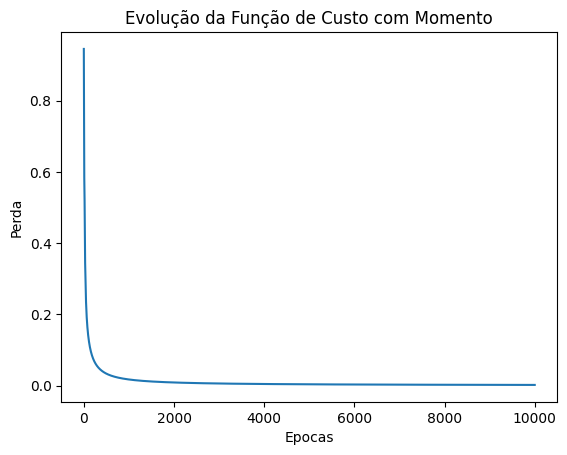

In [2]:
# Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Função de custo - Entropia Cruzada
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-9  # Para evitar log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Dados de entrada (AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])  # Saída esperada para AND

# Inicialização de pesos e bias
np.random.seed(42)
weights = np.random.randn(2, 1)
bias = np.random.randn(1)
learning_rate = 0.1
epochs = 10000
momentum = 0.9  # Valor típico entre 0.8 e 0.99

# Inicializando os deltas de momento
v_weights = np.zeros_like(weights)
v_bias = np.zeros_like(bias)

# Treinamento do modelo com momento
losses = []
for epoch in range(epochs):
    # Forward pass
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    
    # Cálculo da perda
    loss = cross_entropy_loss(y, y_pred)
    losses.append(loss)
    
    # Backpropagation
    error = y_pred - y
    grad_weights = np.dot(X.T, error) / len(X)
    grad_bias = np.mean(error)
    
    # Aplicando momento
    v_weights = momentum * v_weights + learning_rate * grad_weights
    v_bias = momentum * v_bias + learning_rate * grad_bias

    # Atualização dos pesos com momento
    weights -= v_weights
    bias -= v_bias
    
    # Exibir progresso
    if epoch % 1000 == 0:
        print(f'Epoca {epoch}, Perda: {loss}')

# Plot da função de custo ao longo do tempo
plt.plot(losses)
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.title('Evolução da Função de Custo com Momento')
plt.show()
